In [708]:
"""indices of atoms from the topology I used are ordered differently from  that of the example notebook"""

'indices of atoms from the topology I used are ordered differently from  that of the example notebook'

In [1]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

In [2]:
outdir = "/Users/tommysisk/Downloads/CHEM101.6/"
pdb = "butane.pdb"
trajectory = "butane_sim.dcd"
traj = md.load(outdir+trajectory, top=outdir+pdb)

In [3]:
atoms,bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     LIG        0          
1        2   C2       C       1     LIG        0          
2        3   C3       C       1     LIG        0          
3        4   C4       C       1     LIG        0          
4        5  H11       H       1     LIG        0          
5        6  H12       H       1     LIG        0          
6        7  H13       H       1     LIG        0          
7        8  H21       H       1     LIG        0          
8        9  H22       H       1     LIG        0          
9       10  H31       H       1     LIG        0          
10      11  H32       H       1     LIG        0          
11      12  H41       H       1     LIG        0          
12      13  H42       H       1     LIG        0          
13      14  H43       H       1     LIG        0

In [4]:
#calculate C-C bond distances
bond_indices = [[i,i+1] for i in range(3)]
distances = []
for i in bond_indices:
    d = md.compute_distances(traj,[i])[:,0]
    distances.append(d)
distances_arr = np.stack(distances, axis = 1)
    

Text(0.5, 1.0, 'Distribution of C-C atom Distances')

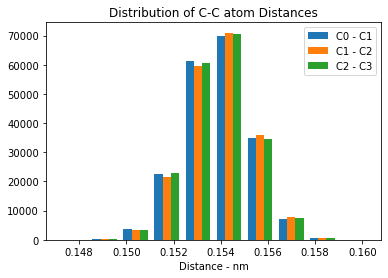

In [5]:
#hist the distances
plt.hist(distances,label=["C{} - C{}".format(i[0],i[1]) for i in bond_indices])
plt.legend()
plt.xlabel("Distance - nm")
plt.title("Distribution of C-C atom Distances")

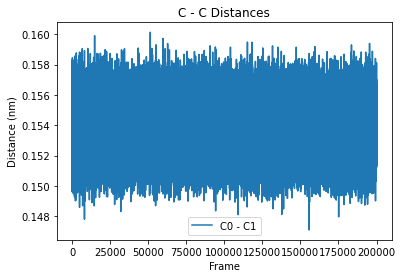

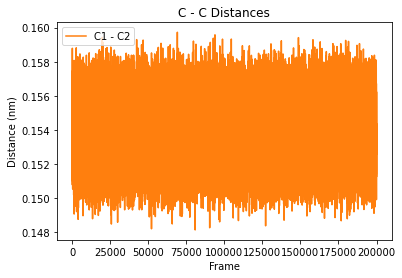

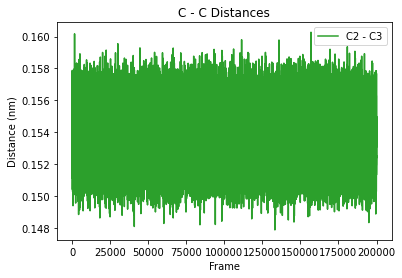

In [6]:
#Plot distances vs. time
for j,(i,ind) in enumerate(zip(distances,bond_indices)):
    plt.figure()
    plt.plot(i,color="C{}".format(j), label="C{} - C{}".format(ind[0],ind[1]))
    plt.xlabel("Frame")
    plt.ylabel("Distance (nm)")
    plt.title("C - C Distances")
    plt.legend()
    
    


In [7]:
#define harmoic potential and resulting force (derivative)
def harmonic_pot(k,lo,l):
    return (k/2)*(l-lo)**2
def spring_force(k,lo,l):
    return k*(l-lo)


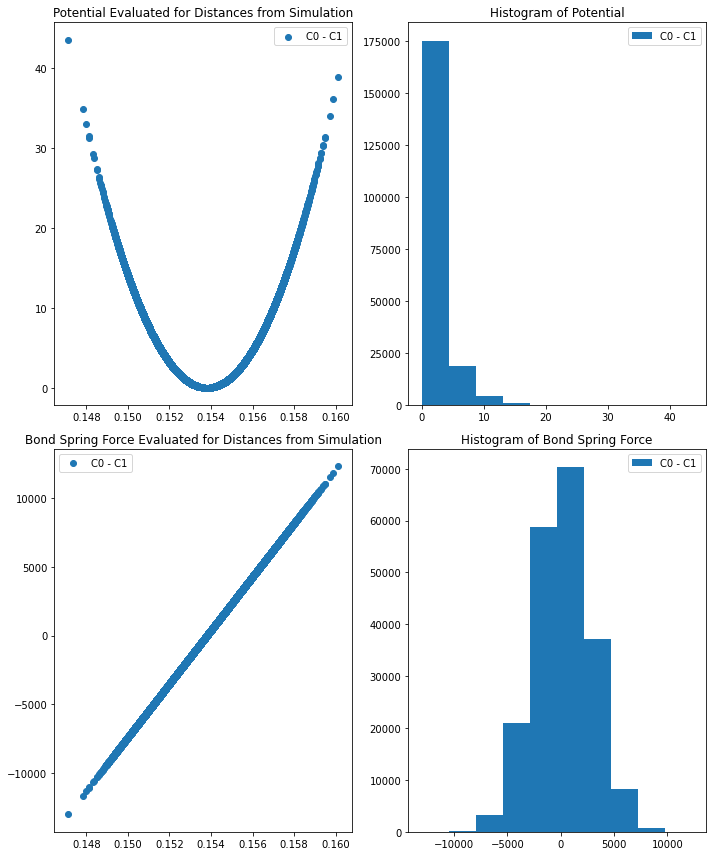

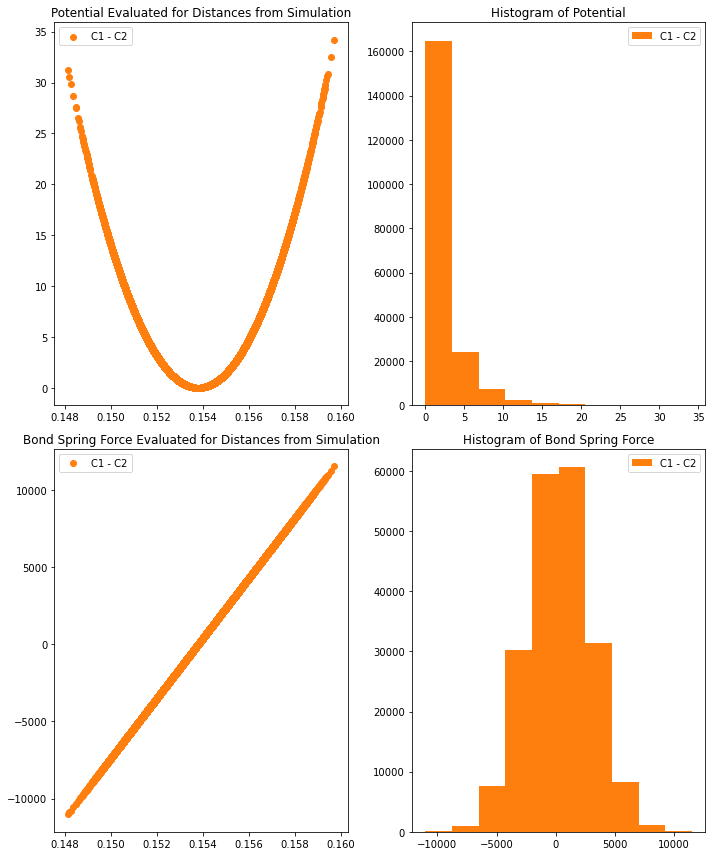

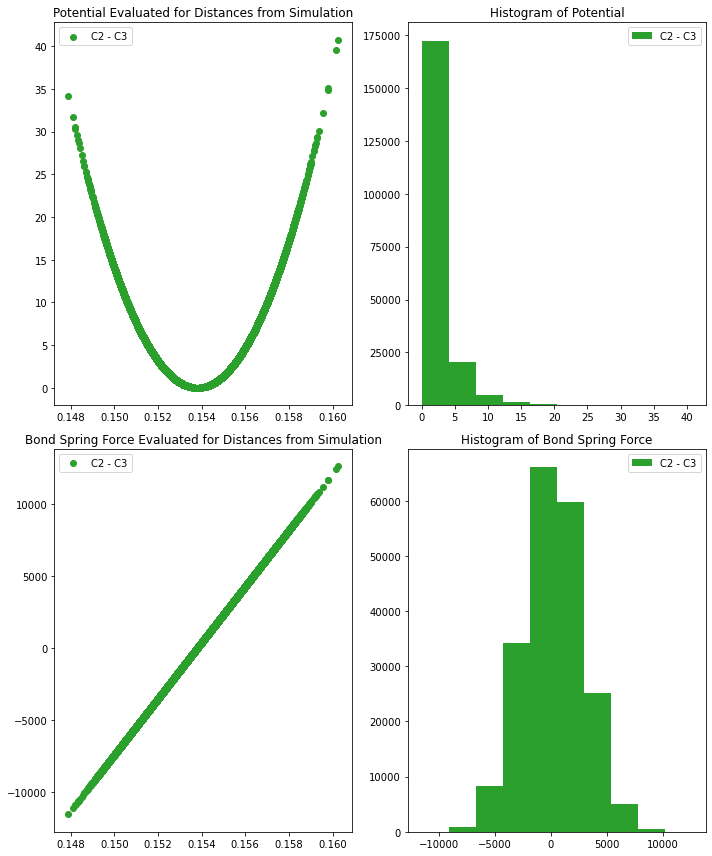

In [8]:
#plot potential and force for each set of distances
k = 1945727.36
lo = .15380
for j,(i,ind) in enumerate(zip(distances,bond_indices)):
    pot = harmonic_pot(k,lo,i)
    force = spring_force(k,lo,i)
    fig,ax = plt.subplots(2,2, figsize=(10,12))
    ax[0,0].scatter(i,pot,color="C{}".format(j),label="C{} - C{}".format(ind[0],ind[1]))
    ax[0,0].set_title("Potential Evaluated for Distances from Simulation")
    ax[0,1].hist(pot,color="C{}".format(j),label="C{} - C{}".format(ind[0],ind[1]))
    ax[0,1].set_title("Histogram of Potential")
    ax[1,0].scatter(i,force,color="C{}".format(j),label="C{} - C{}".format(ind[0],ind[1]))
    ax[1,0].set_title("Bond Spring Force Evaluated for Distances from Simulation")
    ax[1,1].hist(force,color="C{}".format(j),label="C{} - C{}".format(ind[0],ind[1]))
    ax[1,1].set_title("Histogram of Bond Spring Force")
    for n in range(2):
        for m in range(2):
            ax[n,m].legend()
    plt.tight_layout()

Text(0.5, 1.0, 'Bond Spring Force Distribution')

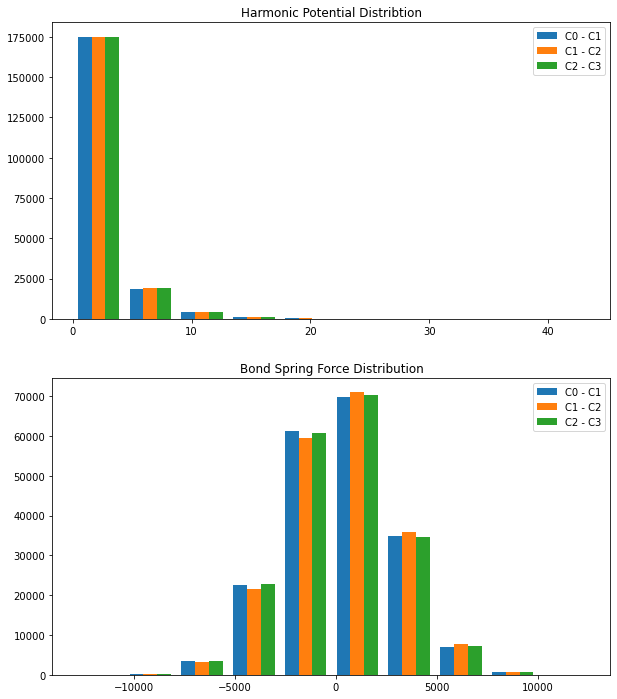

In [9]:
#to look at histograms plotted together
fig,ax = plt.subplots(2,figsize=(10,12))
ax[0].hist([harmonic_pot(k,lo,i) for i in distances], label =["C{} - C{}".format(i[0],i[1]) for i in bond_indices] )
ax[0].legend()
ax[0].set_title("Harmonic Potential Distribtion")

ax[1].hist([spring_force(k,lo,i) for i in distances], label =["C{} - C{}".format(i[0],i[1]) for i in bond_indices] )
ax[1].legend()
ax[1].set_title("Bond Spring Force Distribution")


In [10]:
#define a fxn for var,std
def var_std(d):
    dmf = d - np.average(d)
    var = np.average(dmf**2)
    std = var**(1/2)
    return var, std

In [11]:
#compare function to numpy
for i in distances:
    var_,std_ = var_std(i)
    var = np.var(i)
    std = np.std(i)
    print("var comparision:{},{}".format(var_,var))
    print("std comparision:{},{}".format(std_,std))
    print("Set Finished!")

var comparision:1.883764980448177e-06,1.883764980448177e-06
std comparision:0.0013725031804874542,0.0013725032331421971
Set Finished!
var comparision:1.8930312535303528e-06,1.8930312535303528e-06
std comparision:0.0013758747230508861,0.001375874737277627
Set Finished!
var comparision:1.8842131339624757e-06,1.8842131339624757e-06
std comparision:0.0013726664321540305,0.0013726664474233985
Set Finished!


In [12]:
def fe_2D(p1,p2):
    z,x,y = np.histogram2d(p1,p2,bins=200)
    extent = (x.min(),x.max(),y.min(),y.max())
    F = -np.log(z)
    F[F==np.inf]=-1000
    maxval=np.amax(F)
    F[F==-1000]=maxval
    F[F==-0]=0.000000001
    return F,extent

In [13]:
import scipy

In [14]:
from scipy import stats

/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


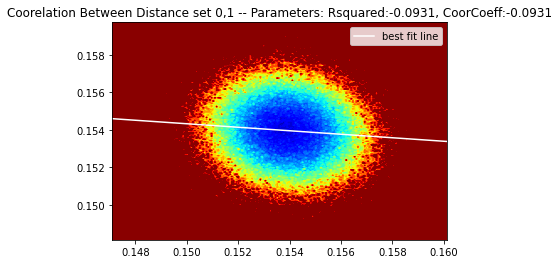

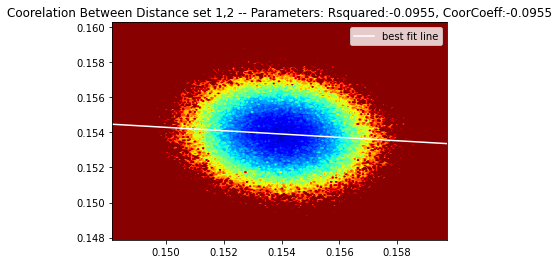

In [686]:
for i in range(2):
    plt.figure()
    f,extent = fe_2D(distances[i],distances[i+1])
    plt.contourf(f.T,50,extent=extent,cmap="jet")
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(distances[i], distances[i+1])
    x = np.linspace(distances[i].min(), distances[i].max(),20)
    y = slope*x+intercept
    plt.plot(x,y,c='w',label='best fit line')
    r=np.corrcoef(distances[i], distances[i+1])[0,1]
    plt.title("Coorelation Between Distance set {},{} -- Parameters: Rsquared:{}, CoorCoeff:{}".format(i,i+1,np.round(r_value,decimals=4),np.round(r,decimals=4)))
    plt.legend()
    

In [687]:
#lets fit some guassians
from scipy.optimize import curve_fit

In [688]:
def pmf(a,x0,xmax,bins):
    counts, edges = np.histogram(a, bins=bins, range=[x0, xmax])
    centers = edges[:-1] + np.diff(edges)/2
    density=counts/np.sum(counts)
    return density, centers

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss, x, y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(centers, fit_a, fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma]

a: 0.18696309545320308 x0: 0.15390704381629253 fit_sigma: -0.0013876793392281984
a: 0.1865889500846928 x0: 0.153957645984619 fit_sigma: -0.0013901634610061695
a: 0.18694255410402622 x0: 0.15391084569394772 fit_sigma: 0.0013877239868879552


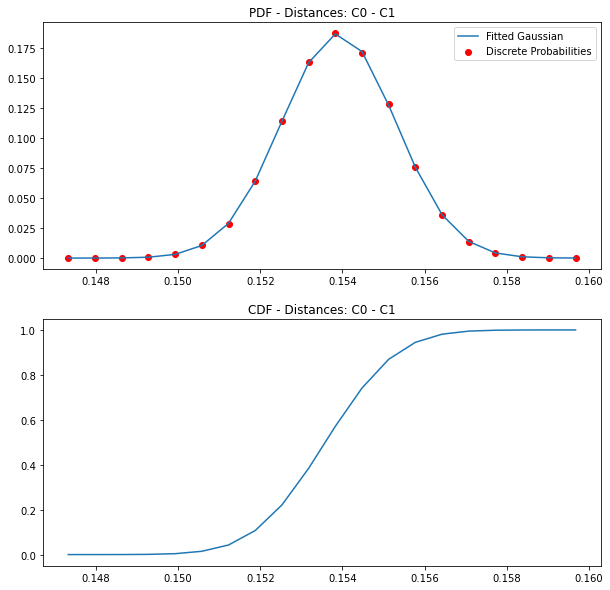

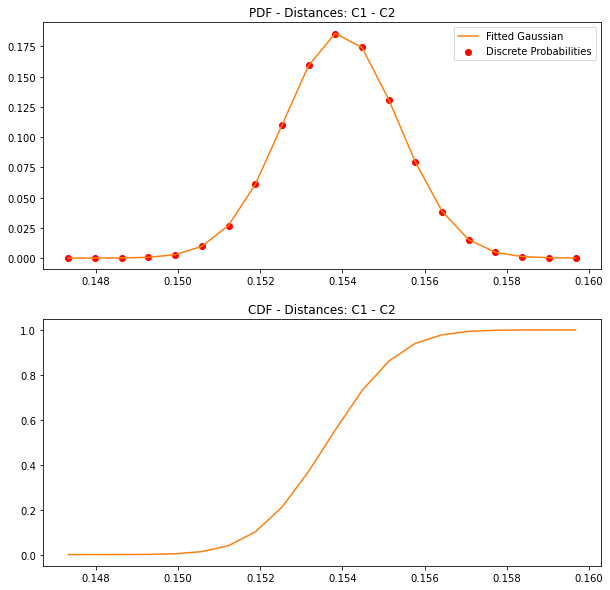

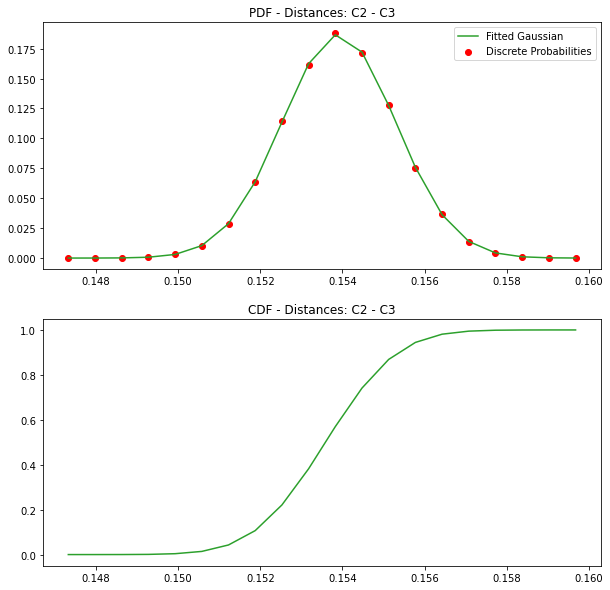

In [46]:
for j,(i,ind) in enumerate(zip(distances,bond_indices)):
    density,centers = histogram_bincenters(i,0.147,0.160,20)
    pdf,params = fit_gauss(centers,density)
    fig,ax = plt.subplots(2,1,figsize=(10,10))
    ax[0].scatter(centers,density,color="r",label="Discrete Probabilities")
    ax[0].plot(centers,pdf,color="C{}".format(j),label="Fitted Gaussian")
    ax[0].legend()
    ax[0].set_title("PDF - Distances: C{} - C{}".format(ind[0],ind[1]))
    ax[1].plot(centers,np.cumsum(density),color="C{}".format(j))
    ax[1].set_title("CDF - Distances: C{} - C{}".format(ind[0],ind[1]))

In [60]:
import random

In [50]:
random_sizes = [10000,100000,150000]

a: 0.1856828100655125 x0: 0.15392532533391085 fit_sigma: -0.001395688348911294
a: 0.18348278904006665 x0: 0.15397431063448058 fit_sigma: -0.0014186780270344008
a: 0.18982595293028448 x0: 0.15389102404194108 fit_sigma: -0.0013665319462768664
a: 0.18387048038452716 x0: 0.15390174847496801 fit_sigma: -0.0014119625793517193
a: 0.18567619825821327 x0: 0.15394469876294514 fit_sigma: -0.0013980336124664102
a: 0.18765442787251635 x0: 0.15390683563231045 fit_sigma: 0.0013833736414939279
a: 0.1846049642355855 x0: 0.15389352271368675 fit_sigma: -0.0014048123999445515
a: 0.1858216167386359 x0: 0.15394276147345548 fit_sigma: -0.0013977060999707967
a: 0.1877641121317371 x0: 0.15390704611169065 fit_sigma: -0.001382161431629254


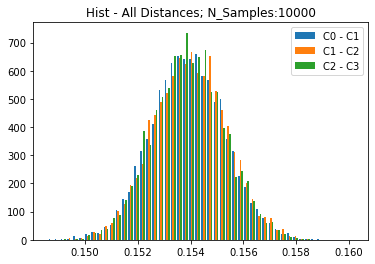

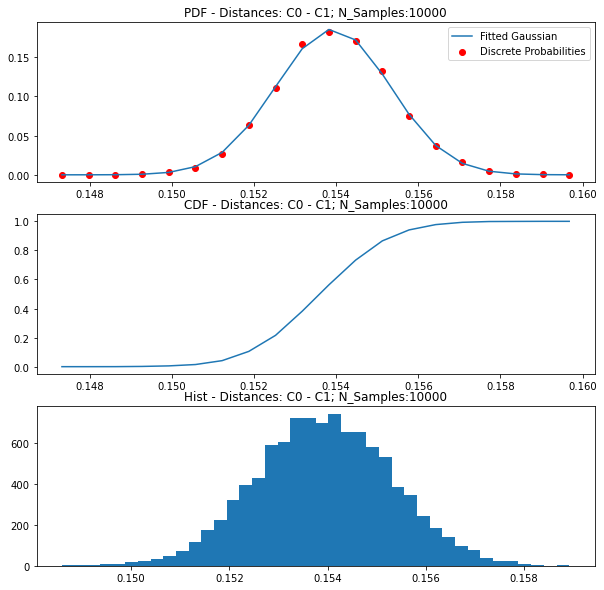

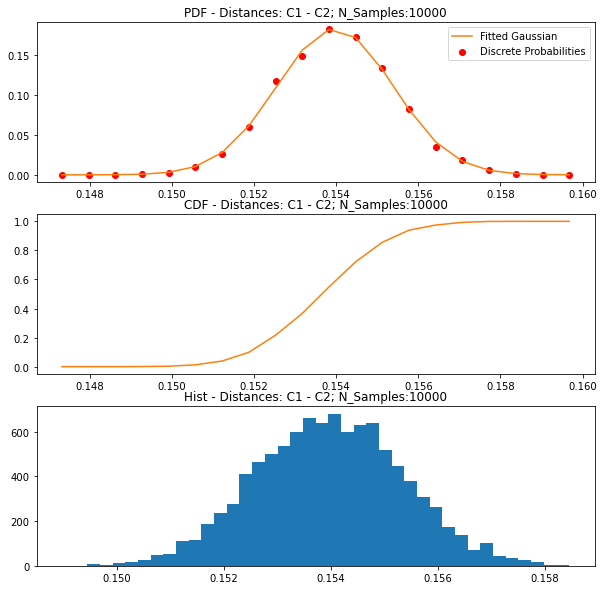

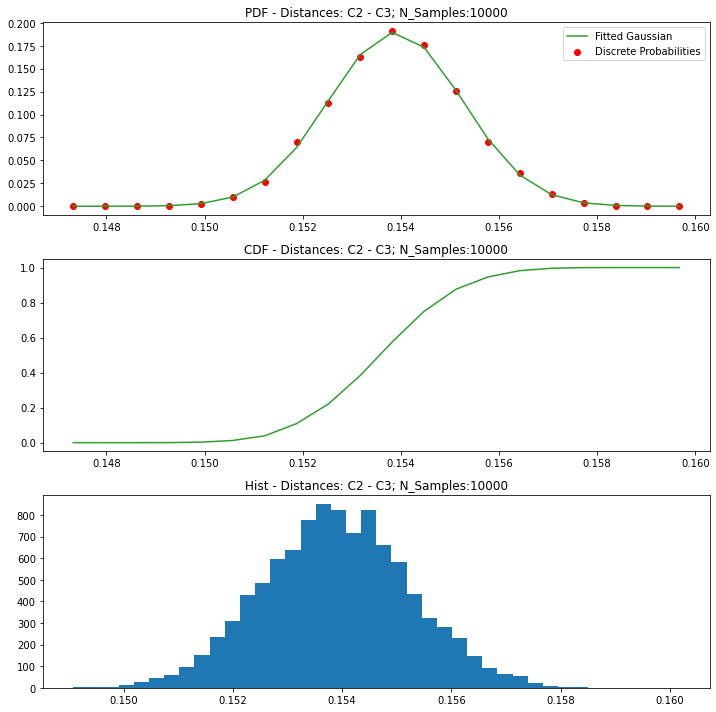

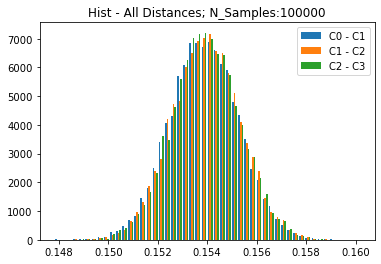

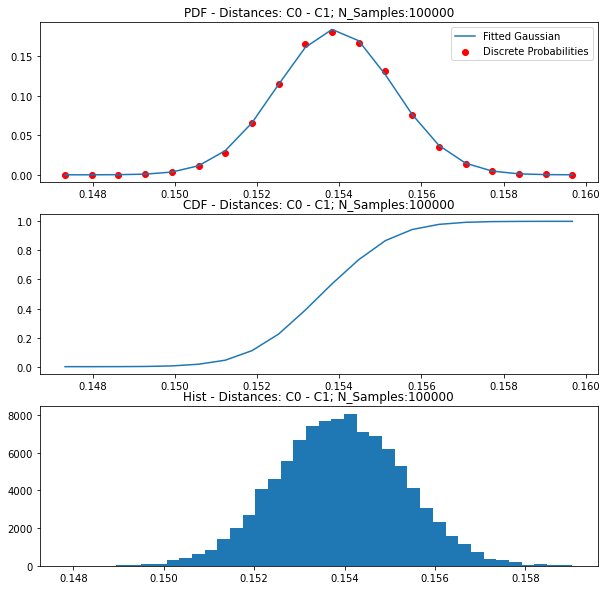

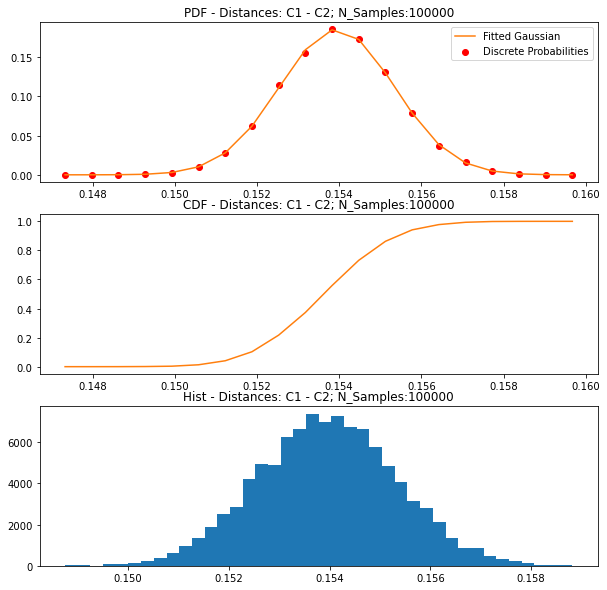

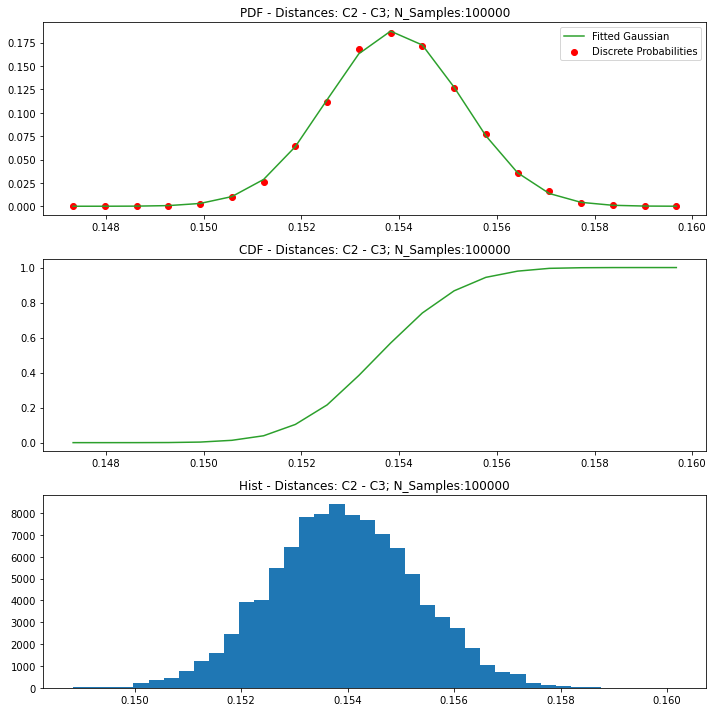

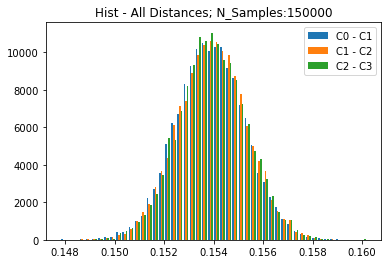

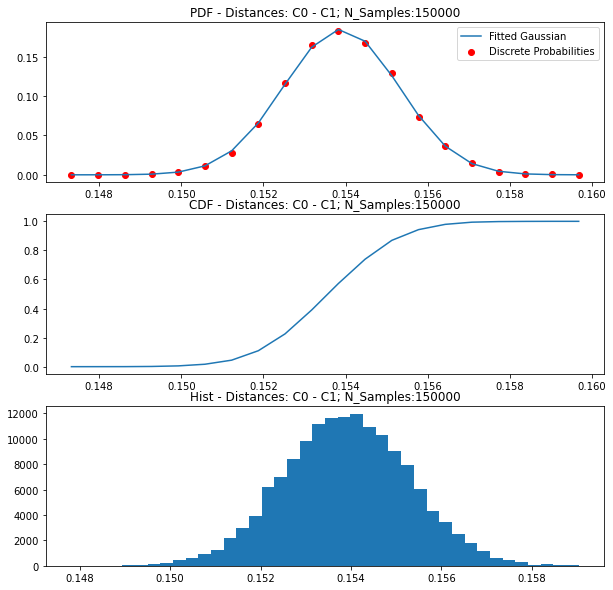

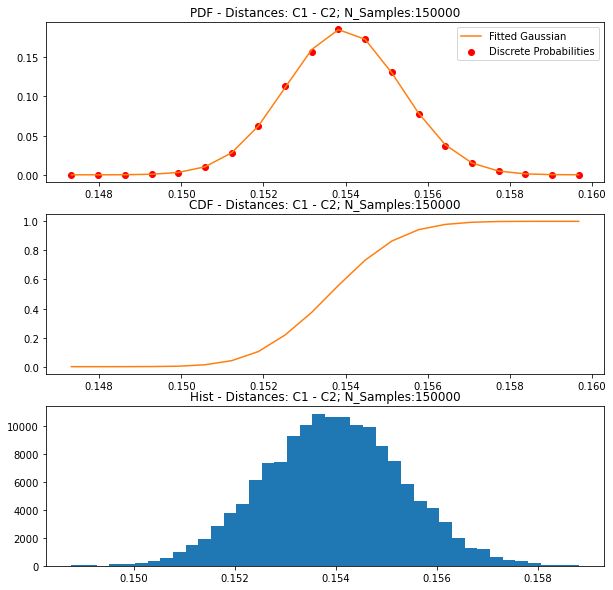

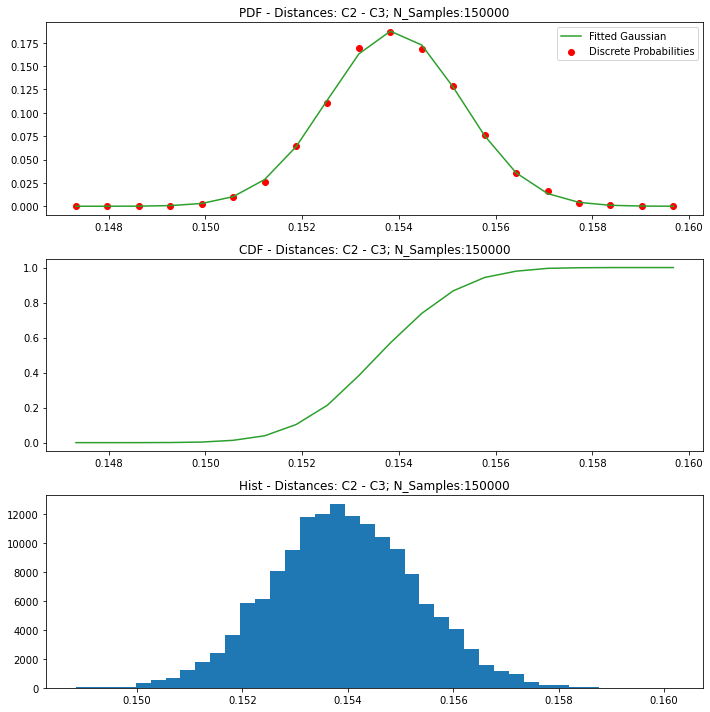

In [62]:
#add a layer to the loop and loop over random samples
for l,s in enumerate(random_sizes):
    distances_ = [distances[f][np.random.randint(10000, size=(s))] for f in range(len(distances))]
    plt.figure()
    plt.hist(distances_,bins=50,label=["C{} - C{}".format(i[0],i[1]) for i in bond_indices])
    plt.title("Hist - All Distances; N_Samples:{}".format(str(s)))
    plt.legend()
    for j,(i,ind) in enumerate(zip(distances_,bond_indices)):
        density,centers = histogram_bincenters(i,0.147,0.160,20)
        pdf,params = fit_gauss(centers,density)
        fig,ax = plt.subplots(3,1,figsize=(10,10))
        ax[0].scatter(centers,density,color="r",label="Discrete Probabilities")
        ax[0].plot(centers,pdf,color="C{}".format(j),label="Fitted Gaussian")
        ax[0].legend()
        ax[0].set_title("PDF - Distances: C{} - C{}; N_Samples:{}".format(ind[0],ind[1],str(s)))
        ax[1].plot(centers,np.cumsum(density),color="C{}".format(j))
        ax[1].set_title("CDF - Distances: C{} - C{}; N_Samples:{}".format(ind[0],ind[1],str(s)))
        ax[2].hist(i,bins=40)
        ax[2].set_title("Hist - Distances: C{} - C{}; N_Samples:{}".format(ind[0],ind[1],str(s)))
    plt.tight_layout()

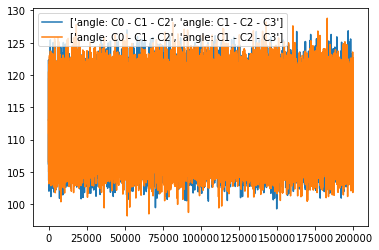

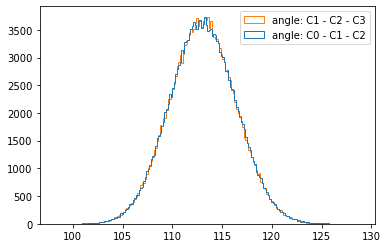

In [131]:
#plot angle indices
ang_indices = [[i,i+1,i+2] for i in range(2)]
a = md.compute_angles(traj,ang_indices)
a = a*(180/np.pi)
plt.figure()
plt.plot(a,label=["angle: C{} - C{} - C{}".format(ang_indices[i][0],ang_indices[i][1],ang_indices[i][2]) for i in range(2)])
plt.legend()
plt.figure()
plt.hist(a,bins=200,histtype='step',label=["angle: C{} - C{} - C{}".format(ang_indices[i][0],ang_indices[i][1],ang_indices[i][2]) for i in range(2)])
plt.legend()                   

/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


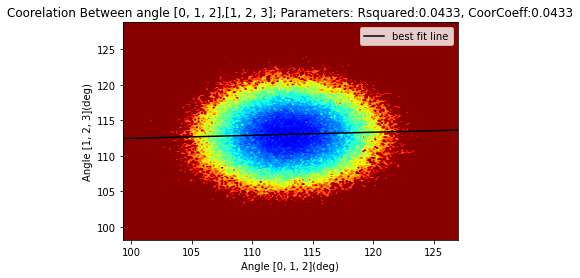

In [143]:
#Coorelation between two angles
plt.figure()
f,extent = fe_2D(a[:,0],a[:,1])
plt.contourf(f.T,50,extent=extent,cmap="jet")
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(a[:,0], a[:,1])
x = np.linspace(a[:,0].min(), a[:,0].max(),20)
y = slope*x+intercept
plt.plot(x,y,c='black',label='best fit line')
r=np.corrcoef(a[:,0], a[:,1])[0,1]
plt.title("Coorelation Between angle {},{}; Parameters: Rsquared:{}, CoorCoeff:{}".format(str(ang_indices[0]),str(ang_indices[1]),np.round(r_value,decimals=4),np.round(r,decimals=4)))
plt.xlabel("Angle {}(deg)".format(str(ang_indices[0])))
plt.ylabel("Angle {}(deg)".format(str(ang_indices[1])))
plt.legend()

Text(0.5, 1.0, 'Distribution of Dihedral')

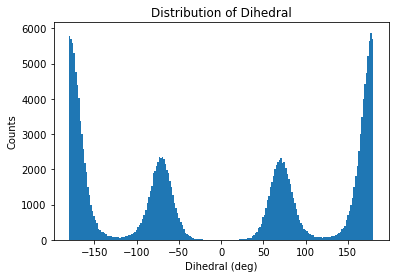

In [145]:
#calculate dihedrals
dihed_indices = list(range(4))
dihed = md.compute_dihedrals(traj,[dihed_indices])
dihed = dihed[:,0]*(180/np.pi)
plt.hist(dihed,bins=200)
plt.xlabel("Dihedral (deg)")
plt.ylabel("Counts")
plt.title("Distribution of Dihedral")

/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


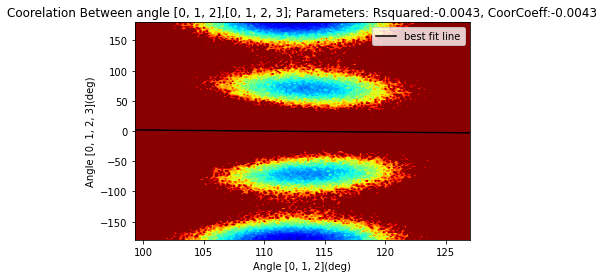

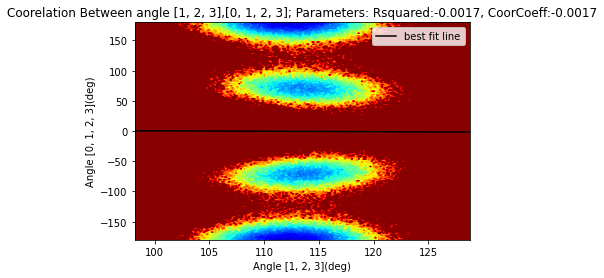

In [147]:
#coorelation between each 3 carbon bond angle and dihedral
for i in range(2):
    plt.figure()
    f,extent = fe_2D(a[:,i],dihed)
    plt.contourf(f.T,50,extent=extent,cmap="jet")
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(a[:,i], dihed)
    x = np.linspace(a[:,i].min(), a[:,i].max(),20)
    y = slope*x+intercept
    plt.plot(x,y,c='black',label='best fit line')     
    r=np.corrcoef(a[:,i], dihed)[0,1]
    plt.title("Coorelation Between angle {},{}; Parameters: Rsquared:{}, CoorCoeff:{}".format(str(ang_indices[i]),str(dihed_indices),np.round(r_value,decimals=4),np.round(r,decimals=4)))
    plt.xlabel("Angle {}(deg)".format(str(ang_indices[i])))
    plt.ylabel("Angle {}(deg)".format(str(dihed_indices)))
    plt.legend()
    

In [293]:
a1 = a[:,0]
a2 = a[:,1]

In [156]:
import seaborn as sns

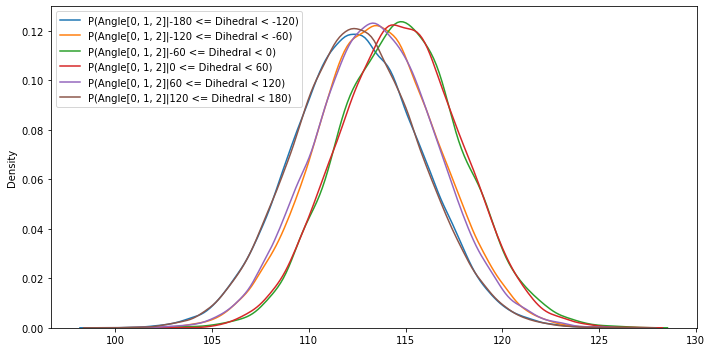

In [181]:
#conditional probabilities

"""you basically have the conditional probability from the heat maps above but we can still partition
the feature spaces and make a bunch of histograms so...here we go"""

bounds = list(range(-180,181,60))
plt.figure(figsize=(10,5))
for i in range(len(bounds)-1):
    sns.kdeplot(a1[(dihed>=bounds[i])&(dihed<bounds[i+1])],alpha=.3,label="P(Angle{}|{} <= Dihedral < {})".format(str(ang_indices[0]),str(bounds[i]),str(bounds[i+1])))
plt.legend(loc="upper left")
plt.tight_layout()

In [ ]:
#lets make a better visualization of the data - 

24


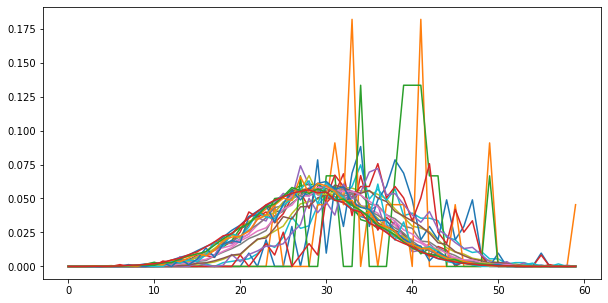

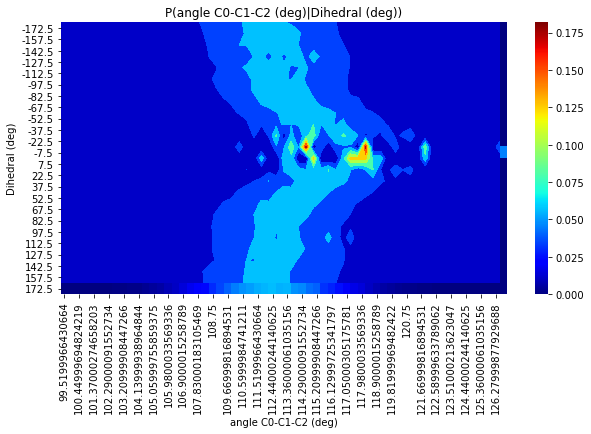

In [652]:
#make heat map of conditional probability over the entire range of diherals conditions
import pandas as pd
bounds = list(range(-180,181,15))
plt.figure(figsize=(10,5))
probs = []
cents = []
for i in range(len(bounds)-1):
    sel = a1[(dihed>=bounds[i])&(dihed<bounds[i+1])]
    p,centers=pmf(sel,a1.min(),a1.max(),bins=60)
    probs.append(p)
    cents.append(np.around(centers,decimals=2))
    plt.plot(p)
arr = np.stack(probs,axis=0)

columns=cents[0]
df = pd.DataFrame(arr,index=dihed_centers,columns=[round(i,2) for i in columns])
fig = plt.figure(figsize=(10,5))
sns.heatmap(df,cmap="jet")
plt.contourf(df,cmap="jet")
plt.title("P(angle C0-C1-C2 (deg)|Dihedral (deg))")
plt.ylabel("Dihedral (deg)")
plt.xlabel("angle C0-C1-C2 (deg)")

print(len(cents))


Text(0.5, 24.0, 'angle C0-C1-C2 (deg)')

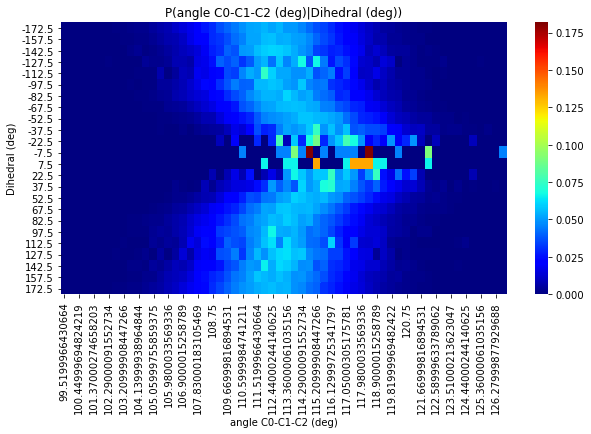

In [646]:
plt.figure(figsize=(10,5))
sns.heatmap(df,cmap="jet")
plt.title("P(angle C0-C1-C2 (deg)|Dihedral (deg))")
plt.ylabel("Dihedral (deg)")
plt.xlabel("angle C0-C1-C2 (deg)")

In [307]:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

[     0      1      2 ... 199997 199998 199999]


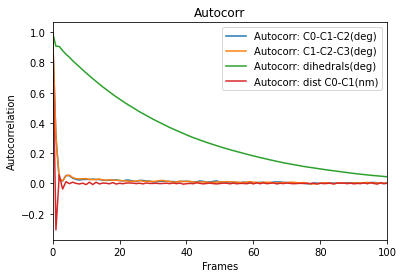

In [321]:
time=np.arange(200000)
print(time)
data = {"C0-C1-C2(deg)":a1,"C1-C2-C3(deg)":a2,"dihedrals(deg)":np.cos(dihed*np.pi/180),"dist C0-C1(nm)":distances[0]}
lags=np.arange(500)
for j,i in enumerate(list(data.keys())):
    auto = autocorr1(data[i],lags)
    plt.plot(lags,auto,color="C{}".format(str(j)),label="Autocorr: {}".format(i))
    plt.title("Autocorr")
    plt.ylabel("Autocorrelation")
    plt.xlabel("Frames")
    plt.xlim((0,100))
    plt.legend()


In [322]:
traj

<mdtraj.Trajectory with 200000 frames, 14 atoms, 1 residues, without unitcells at 0x7fa76bc74e10>

In [337]:
from itertools import combinations
from itertools import product

No handles with labels found to put in legend.


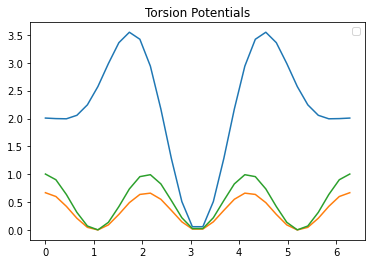

In [778]:
#Plot The Torsion Force Field Terms
import math
#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets right a function that takes paramters from the xml and writes the force field term

def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e


def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCC_torsionE_corr(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 e4=gauss(angle,-10*params[0][0],params[0][1],params[0][2])+ gauss(angle,15*params[1][0],params[1][1],params[1][2]) + gauss(angle,-10*params[2][0],params[2][1],params[2][2])
 return e1+e2+e3+e4


def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e_corr = CCCC_torsionE_corr(rad_ang)
CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)

#plt.plot(rad_ang,CCCC_e_corr,c="r",label="CCCC Corrected")
plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCH_e)
plt.plot(rad_ang,HCCH_e)
plt.title("Torsion Potentials")
plt.legend()

In [697]:
"""gonna have to correct the scales/ways that the diehrals
are measured to get agreement between function and mdtraj calculation"""
dihed_rad = dihed*np.pi/180
dihed_mod = np.where(dihed_rad<0,dihed_rad+2*np.pi,dihed_rad)

Text(0.5, 1.0, 'Distribution of Dihedral')

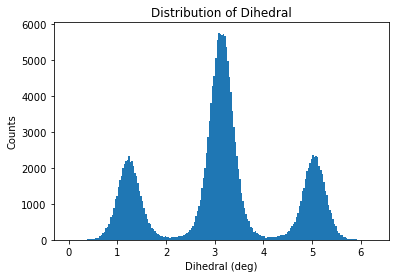

In [717]:
#now the plotted torsion function and histogram match up
plt.hist(dihed_mod,bins=200)
plt.xlabel("Dihedral (deg)")
plt.ylabel("Counts")
plt.title("Distribution of Dihedral")

In [655]:
"""fitting/fixing the dihedrals - my idea is to fit each peak 
with a guassian, once we have those parameters, the amplitudes and signs
of the guassians can be minipulated and finally added to the potentials"""

In [701]:
r = (np.pi/180)

In [703]:
bounds = [[25*r,125*r],[125*r,225*r],[225*r,325*r]]
print(bounds)

[[0.4363323129985824, 2.181661564992912], [2.181661564992912, 3.9269908169872414], [3.9269908169872414, 5.672320068981571]]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


a: 0.053011454390899805 x0: 1.2361734766426213 fit_sigma: 0.2329687461355575
a: 0.05168281059486449 x0: 3.1423676974024324 fit_sigma: -0.23992068631988422
a: 0.053171074005696844 x0: 5.046517505323167 fit_sigma: 0.23013888305718663


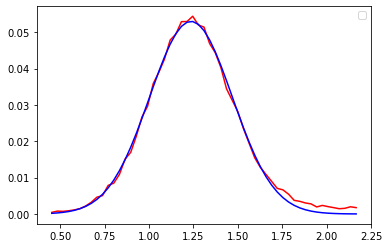

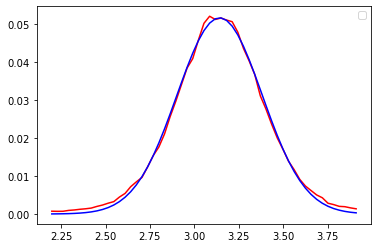

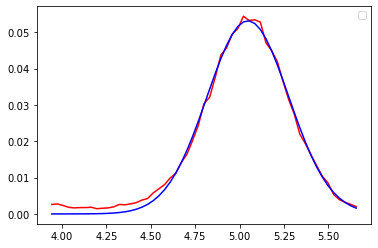

In [733]:
"""lets plot all of the gaussians fitted to the peaks and collect params"""
probs = []
cents = []
pdfs = []
params = []
for i,j in bounds:
    sel = dihed_mod[(i<=dihed_mod)&(dihed_mod<j)]
    plt.figure() 
    p,centers=pmf(sel,sel.min(),sel.max(),bins=55)
    plt.plot(centers,p,c="r")
    probs.append(p)
    cents.append(centers)
    pdf,params_ = fit_gauss(centers,p)
    pdfs.append(pdf)
    params.append(params_)
    plt.plot(centers,pdf,c='b')
    plt.legend()
    
#arr = np.stack(probs,axis=0)

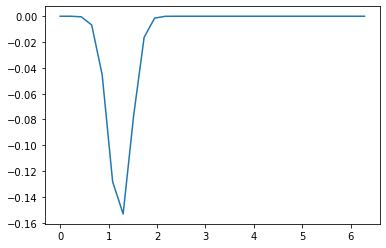

In [743]:
def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))
plt.plot(rad_ang,gauss(rad_ang,-3*params[0][0],params[0][1],params[0][2]))

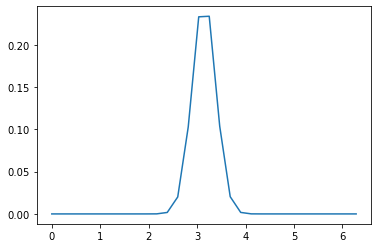

In [736]:
plt.plot(rad_ang,gauss(rad_ang,5*params[1][0],params[1][1],params[1][2]))

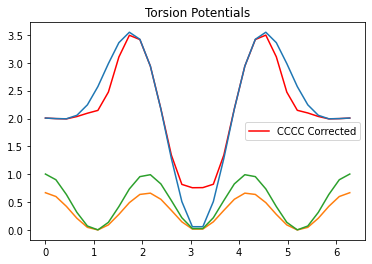

In [779]:
#Here's the corrected potential atop the originalt

CCCC_e_corr = CCCC_torsionE_corr(rad_ang)
CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)

plt.plot(rad_ang,CCCC_e_corr,c="r",label="CCCC Corrected")
plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCH_e)
plt.plot(rad_ang,HCCH_e)
plt.title("Torsion Potentials")
plt.legend()

In [392]:
atoms,bonds = traj.topology.to_dataframe()
atoms


serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     LIG        0          
1        2   C2       C       1     LIG        0          
2        3   C3       C       1     LIG        0          
3        4   C4       C       1     LIG        0          
4        5  H11       H       1     LIG        0          
5        6  H12       H       1     LIG        0          
6        7  H13       H       1     LIG        0          
7        8  H21       H       1     LIG        0          
8        9  H22       H       1     LIG        0          
9       10  H31       H       1     LIG        0          
10      11  H32       H       1     LIG        0          
11      12  H41       H       1     LIG        0          
12      13  H42       H       1     LIG        0          
13      14  H43       H       1     LIG        0

In [576]:
#lets find all the different torsions and classify by type
HCCH = []
for i in range(4,7):
    for j in range(7,9):
        HCCH.append([i,0,1,j])
for i in range(11,14):
    for j in range(9,11):
        HCCH.append([i,3,2,j])
for i in range(7,9):
    for j in range(9,11):
        [i,1,2,j]

# CCCH = []
# for i in range(9,11):
#     CCCH.append([0,1,2,i])  
# for i in range(11,14):
#     CCCH.append([1,2,3,i])
# for i in range(7,9):
#     CCCH.append([3,2,1,i])
# for i in range(4,7):
#     CCCH.append([2,1,0,i])

CCCC = list([0,1,2,3])

HCCC = []
for i in range(4,7):
    HCCC.append([i,0,1,2])
for i in range(11,14):
        HCCC.append([i,3,2,1])
for i in range(7,9):
    HCCC.append([i,1,2,3])
for i in range(9,11):
    HCCC.append([i,2,1,0])

In [577]:
#Calculate all of the torsions
tor_d = {"HCCH":HCCH,"HCCC":HCCC}
names = list(tor_d.keys())
tors = []
for j,i in enumerate(list(tor_d.keys())):
        tor = [md.compute_dihedrals(traj,[tor_d[i][k]])[:,0]*(180/np.pi) for k in range(len(tor_d[i]))]
        tors.append(tor)
print(len(tors))                   

2


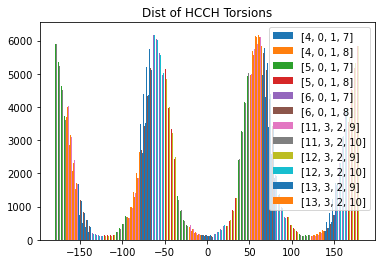

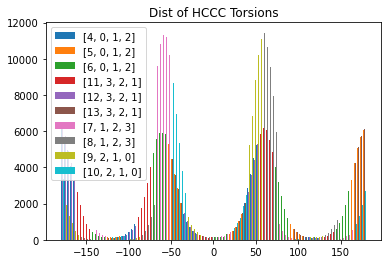

In [622]:
#plot distribution for each torsion angle
for i,name in enumerate(list(tor_d.keys())):
    plt.figure()
    plt.hist(tors[i],bins=100,label=[str(i) for i in tor_d[name]])
    plt.title("Dist of {} Torsions".format(name))
    plt.legend()
        

/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by ze

/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by ze

/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by ze

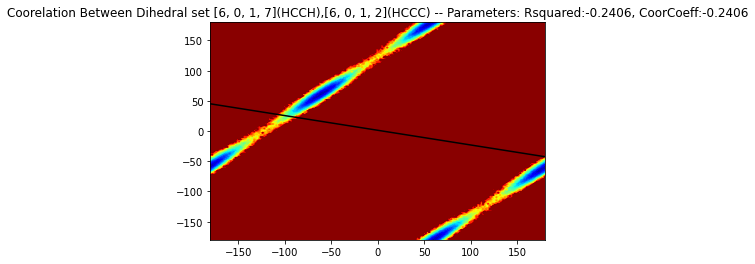

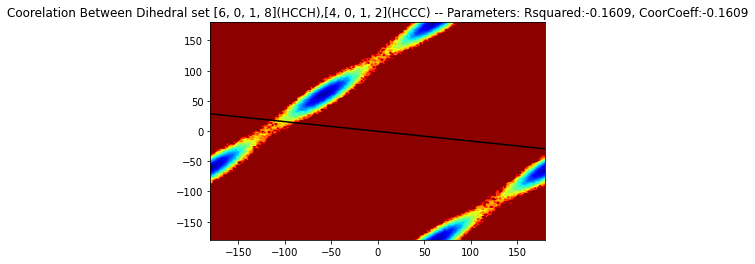

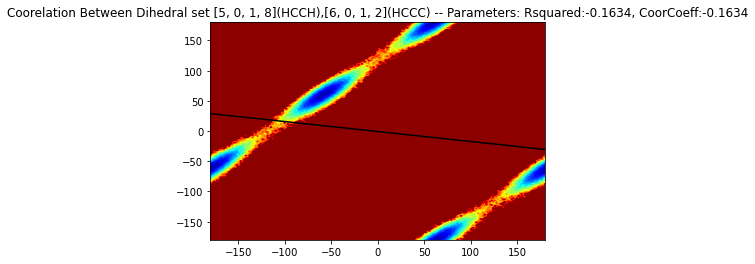

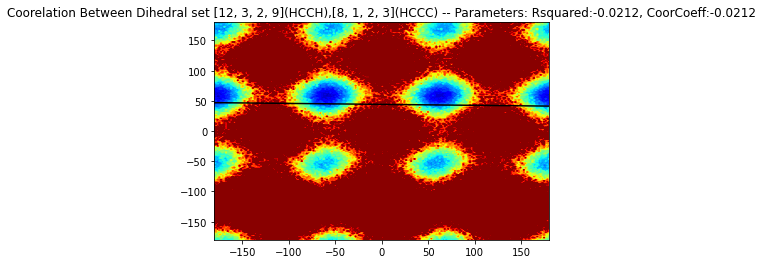

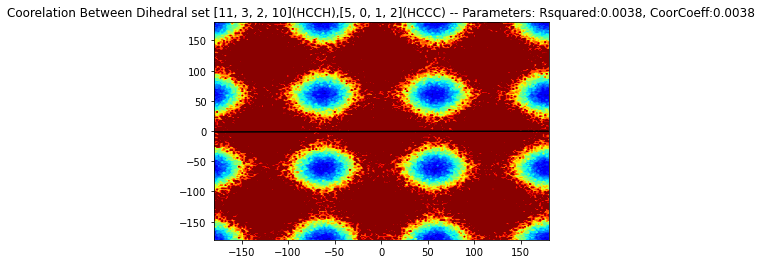

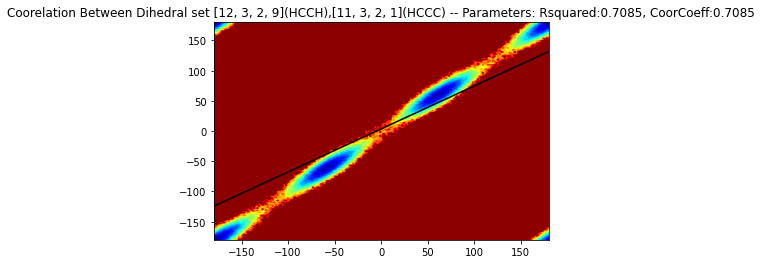

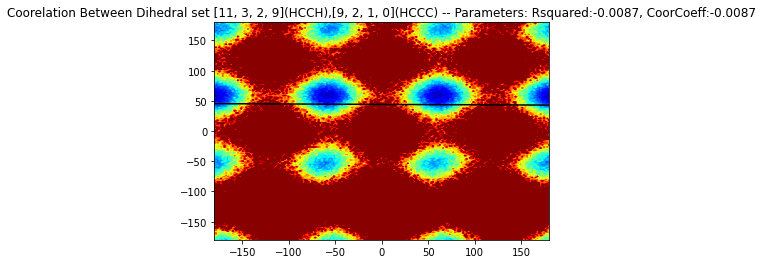

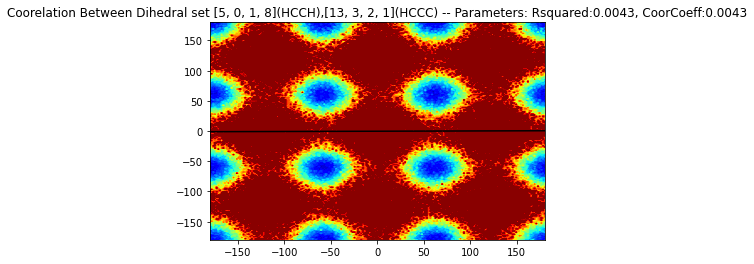

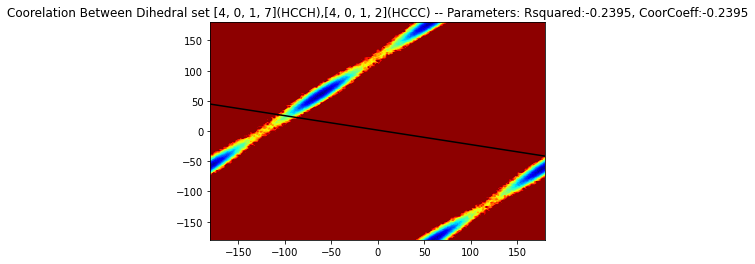

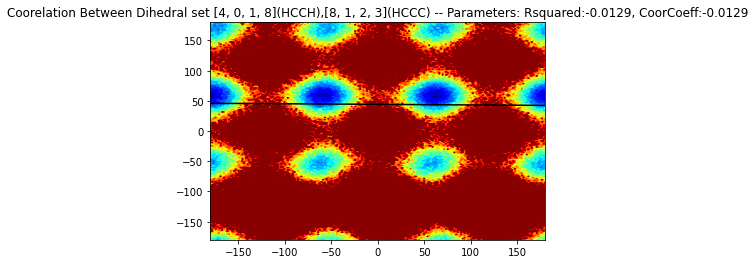

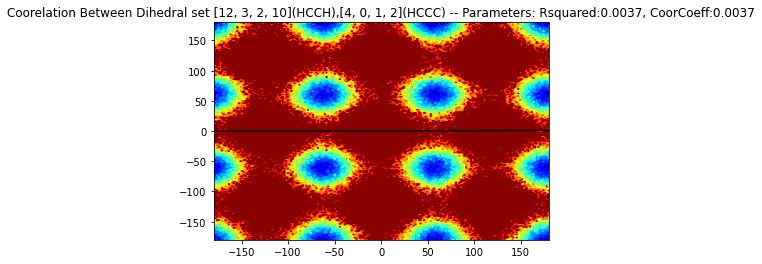

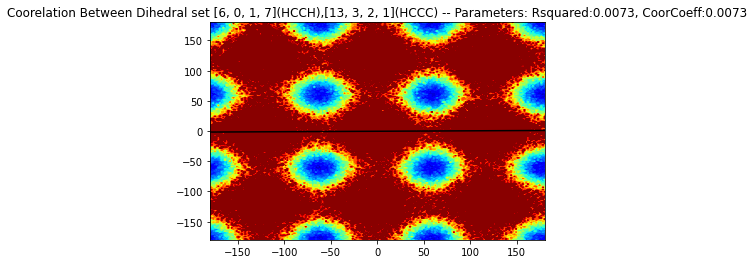

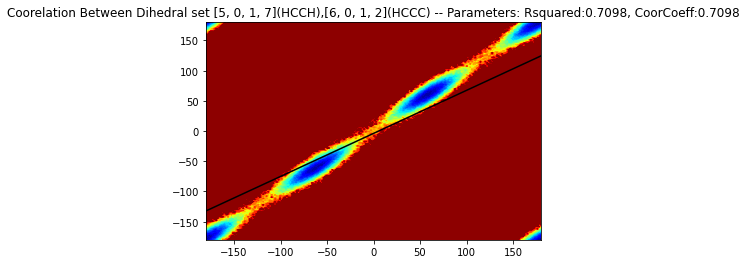

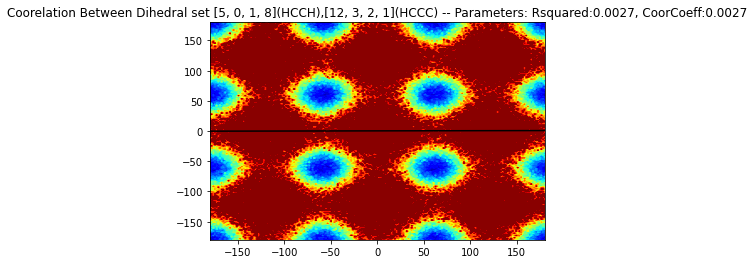

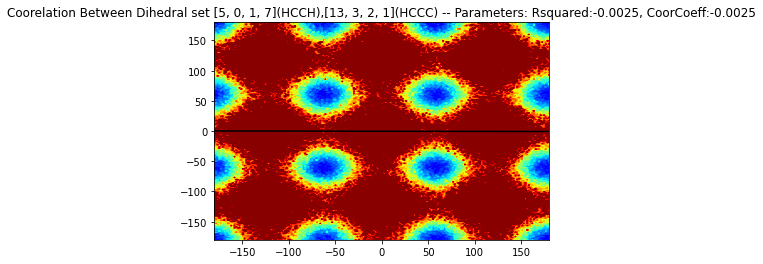

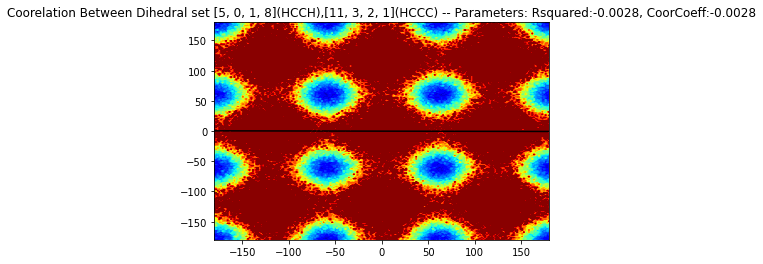

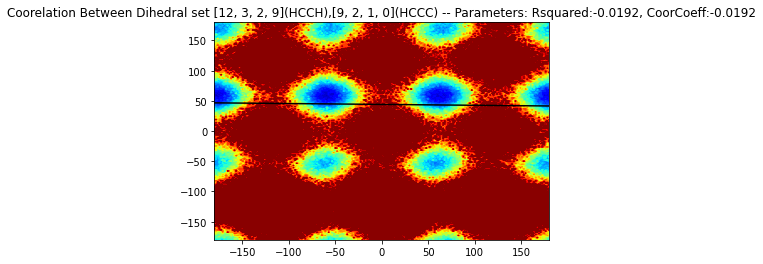

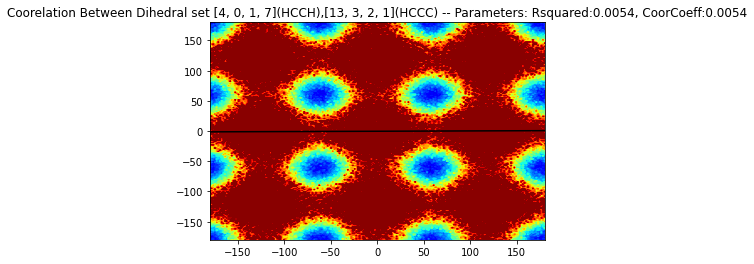

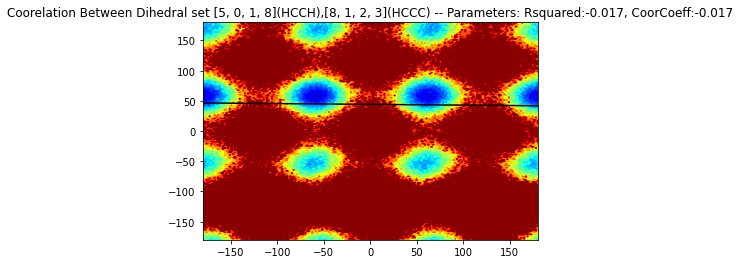

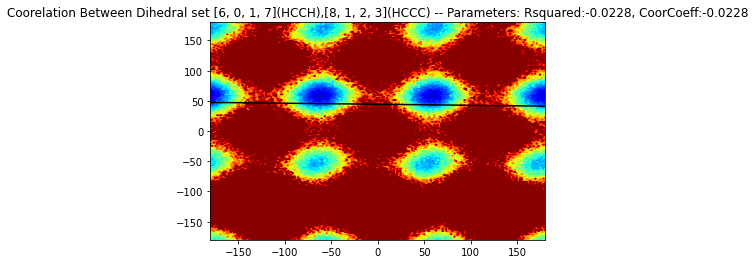

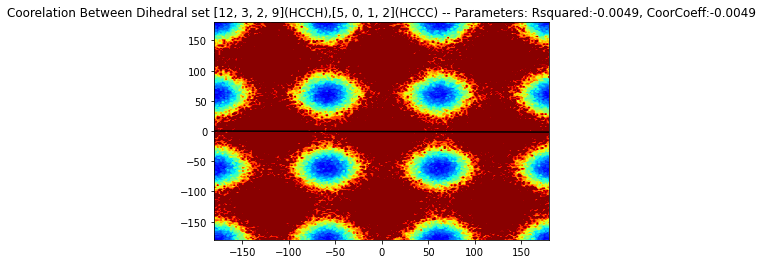

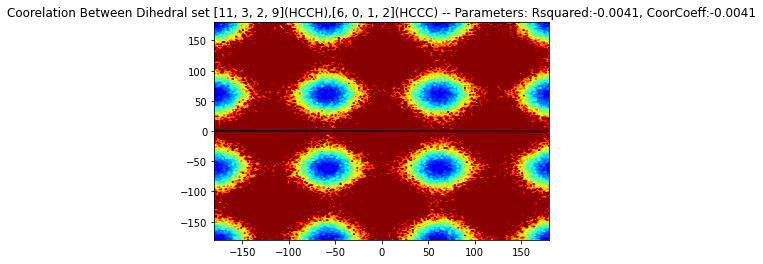

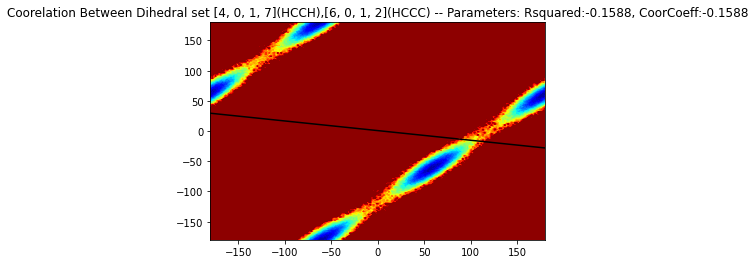

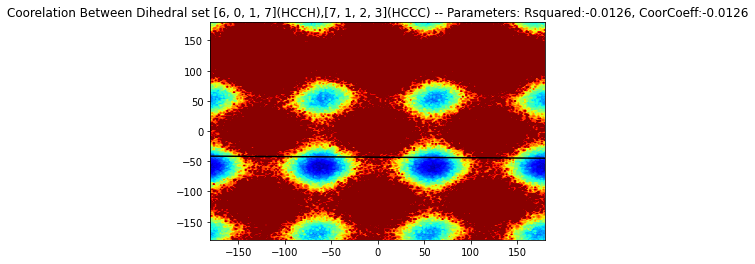

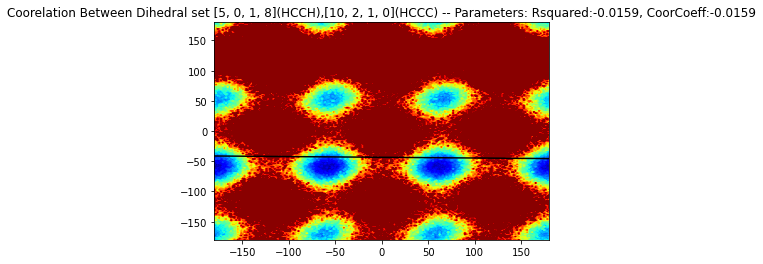

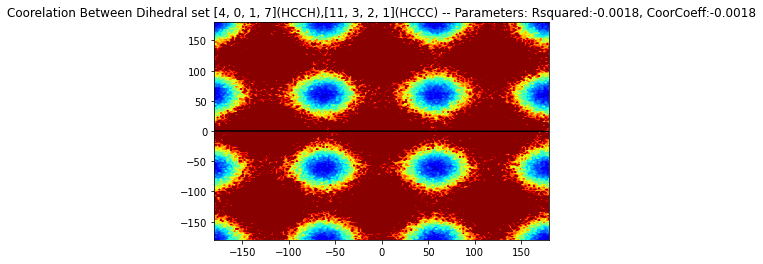

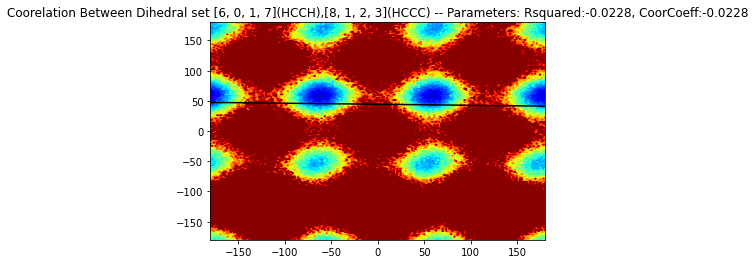

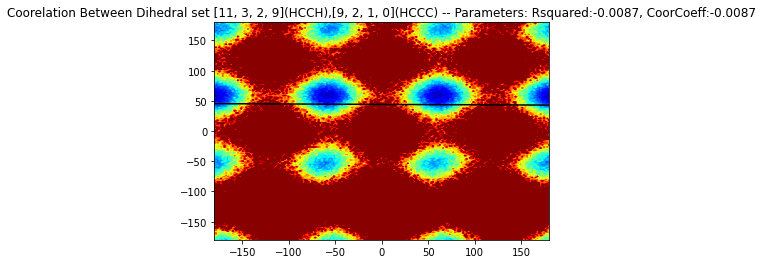

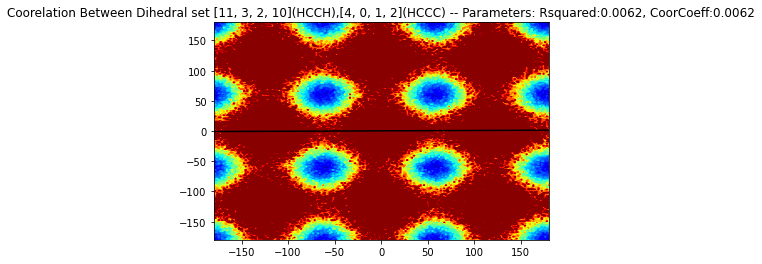

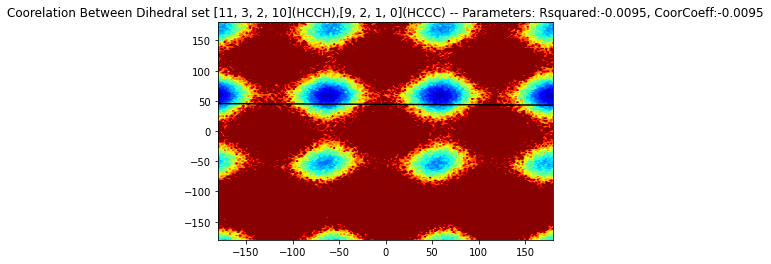

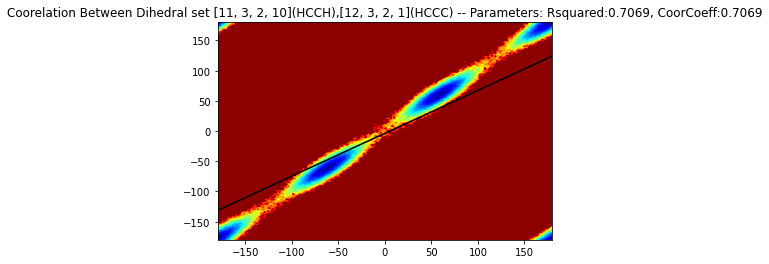

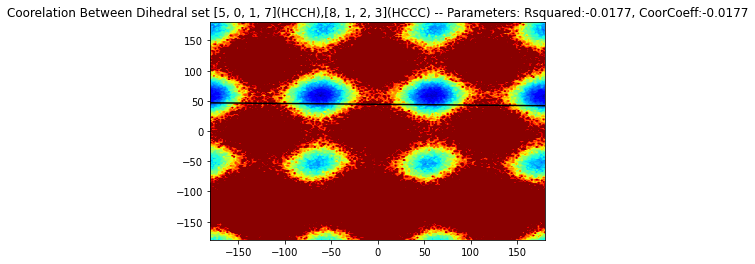

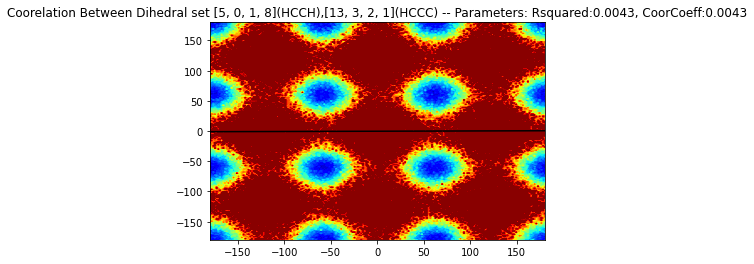

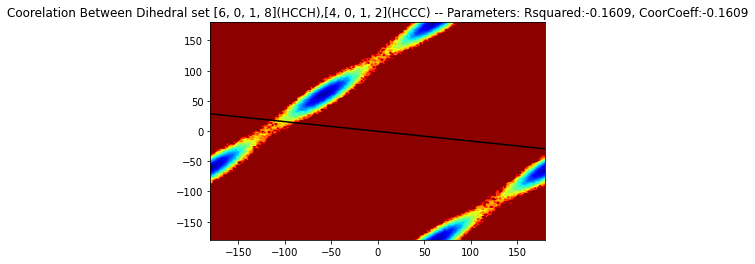

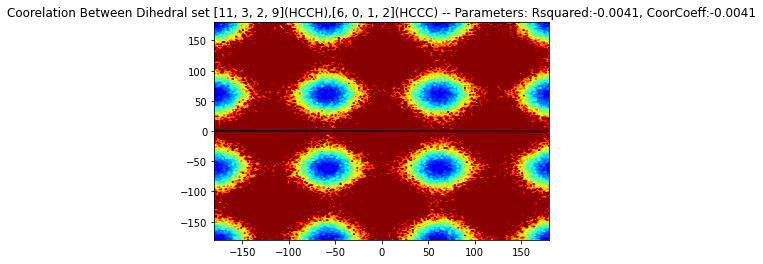

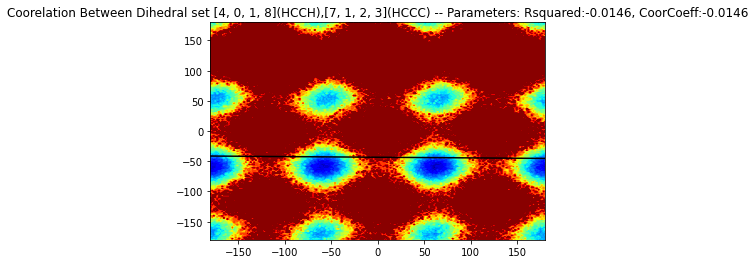

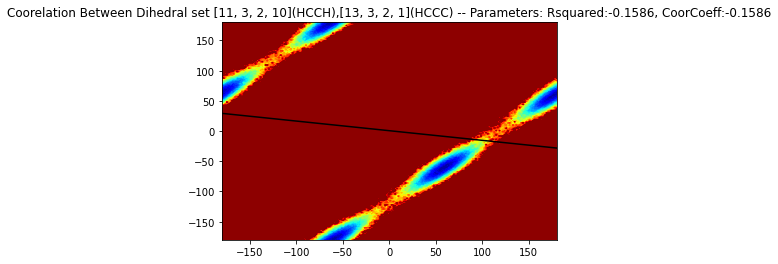

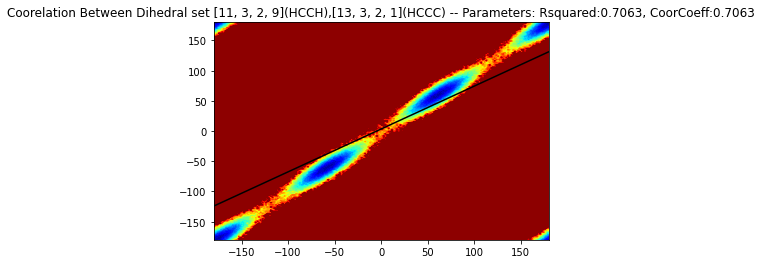

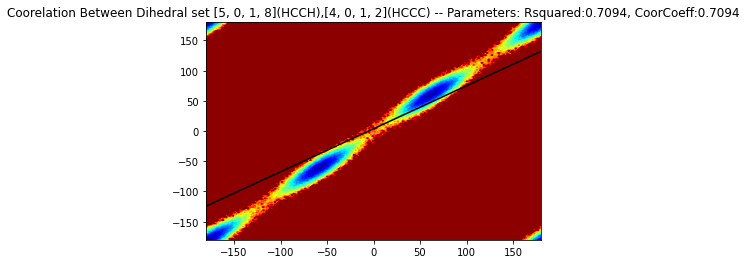

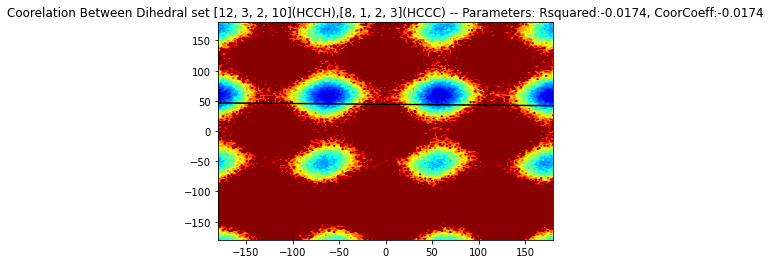

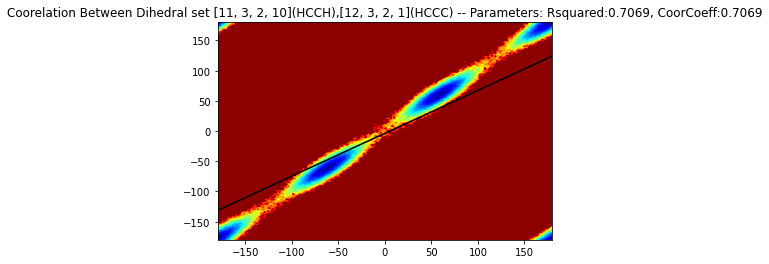

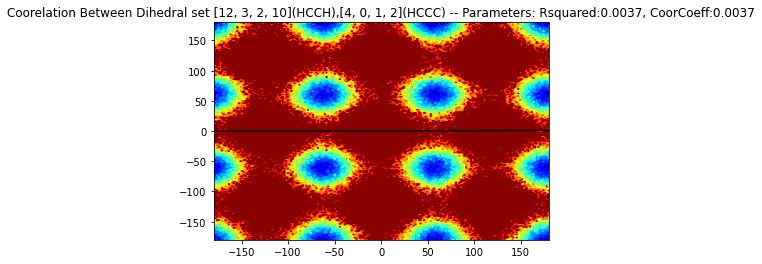

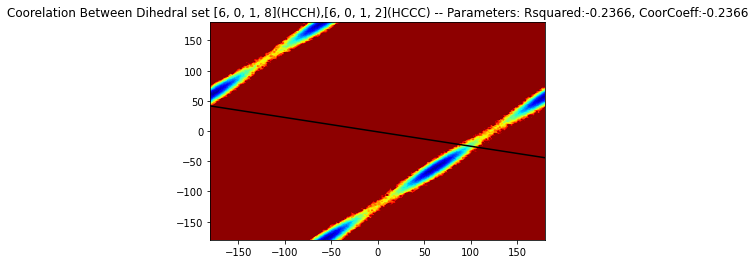

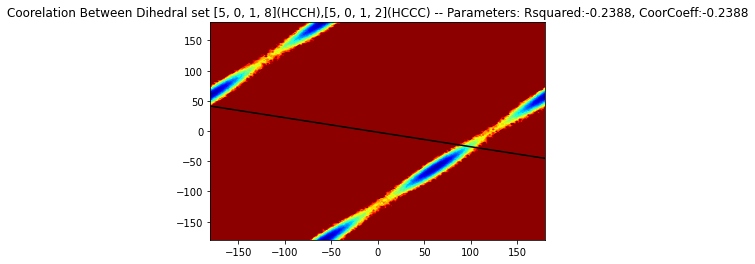

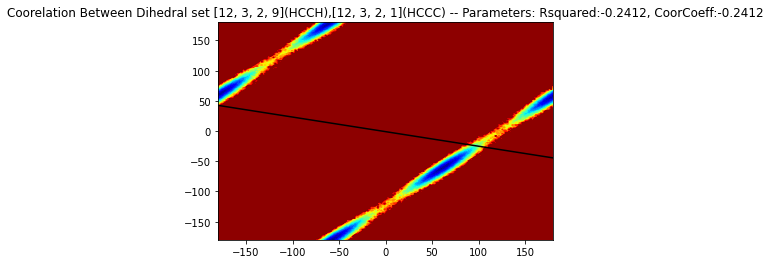

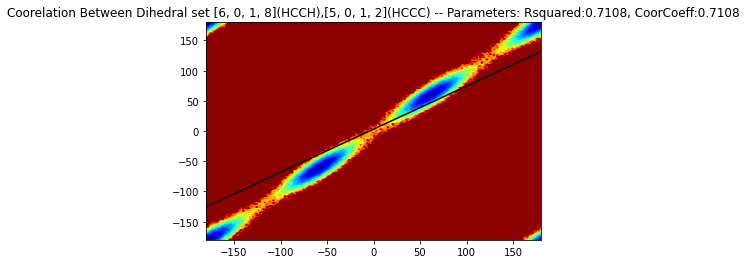

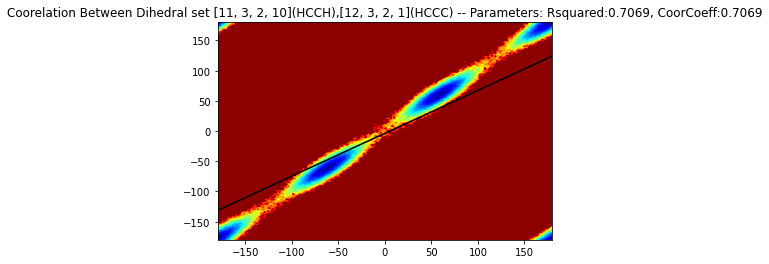

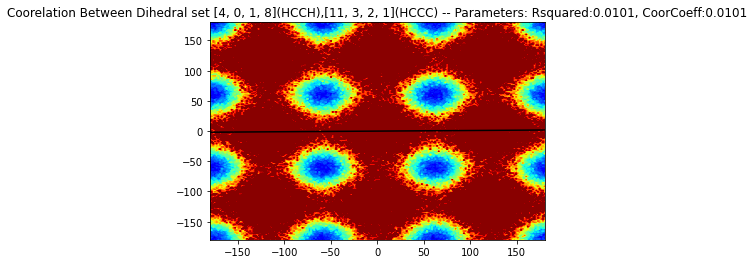

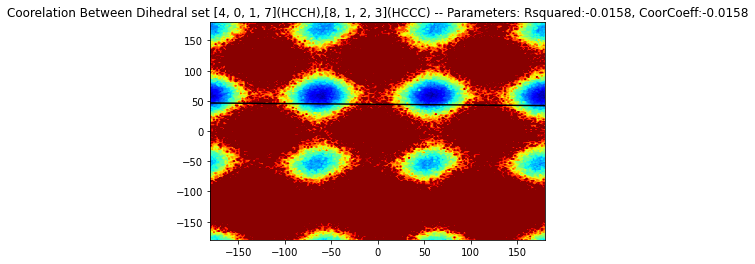

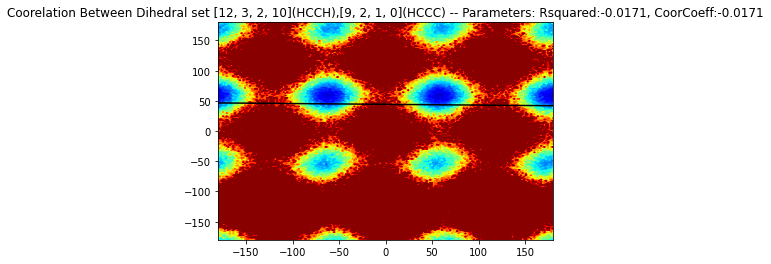

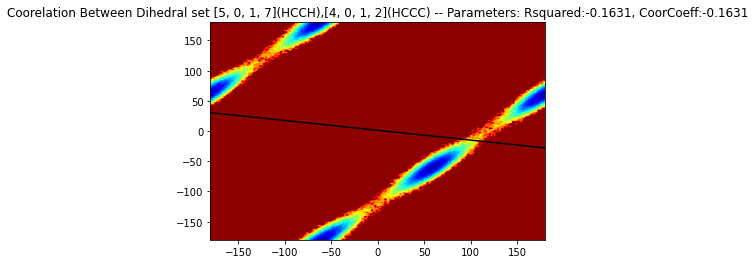

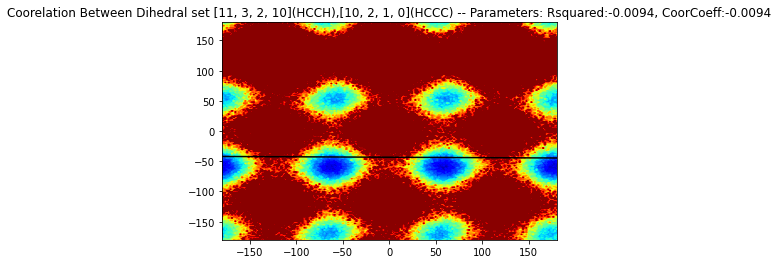

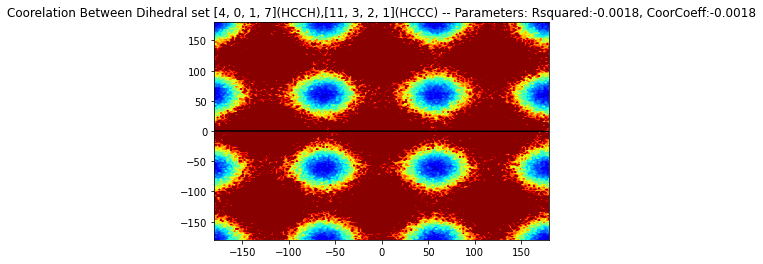

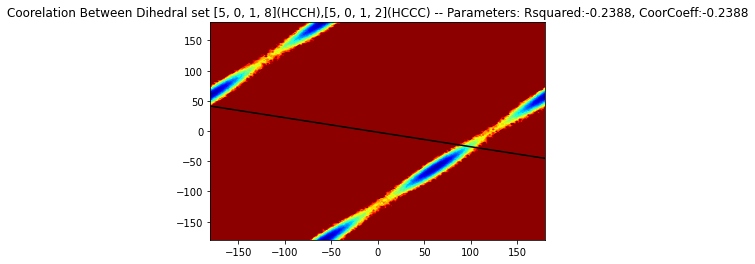

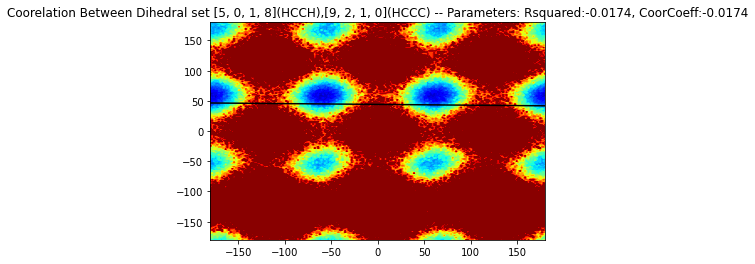

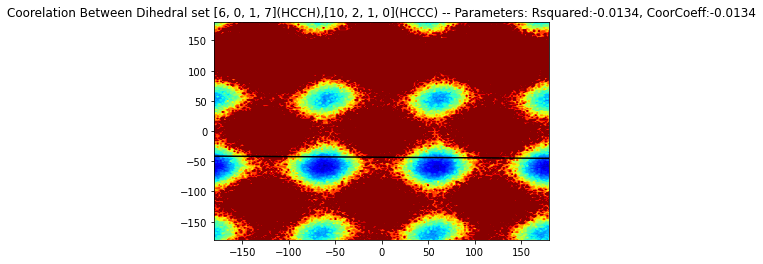

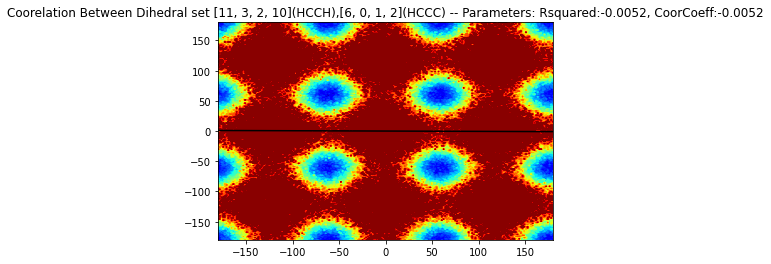

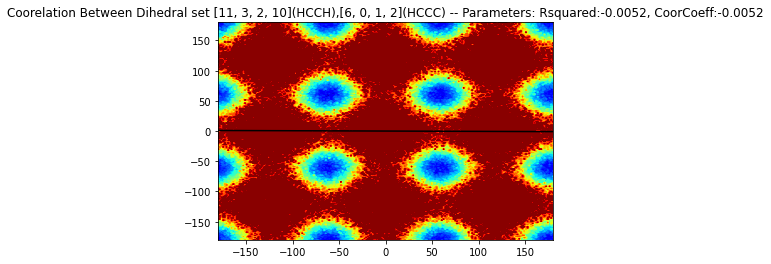

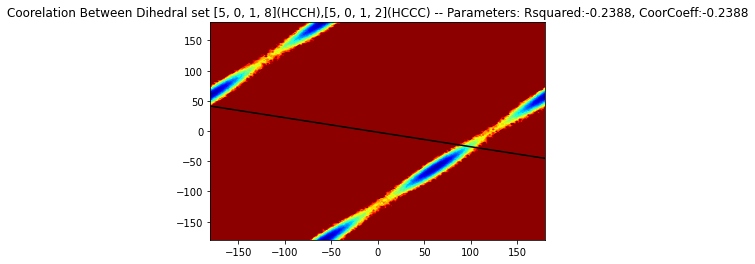

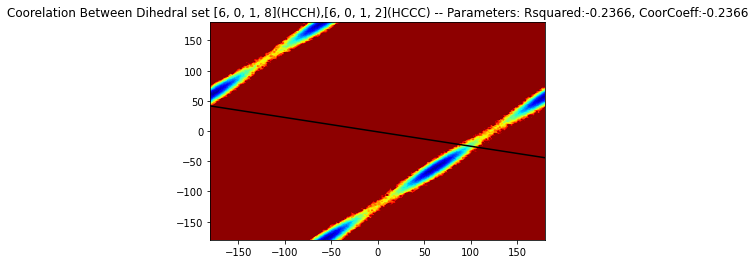

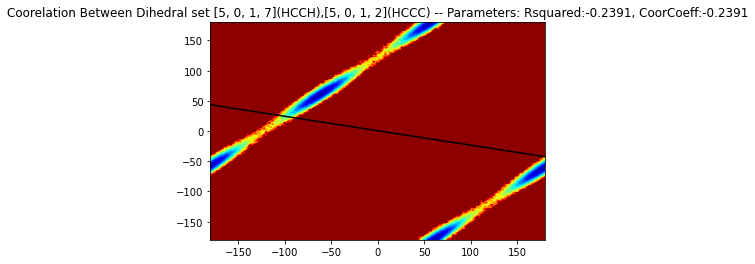

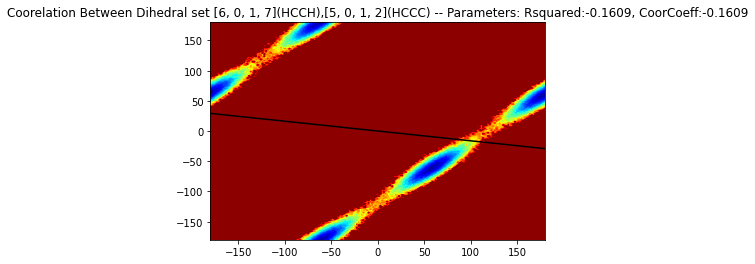

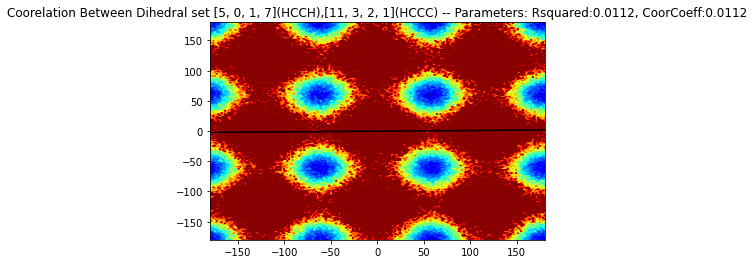

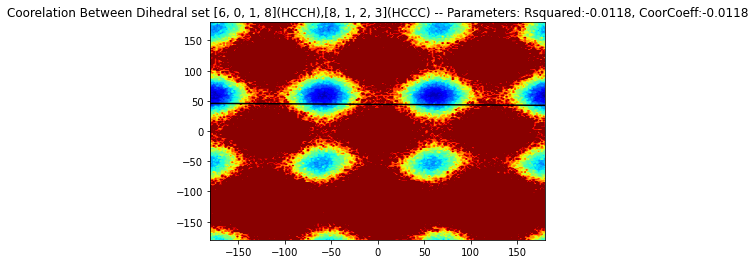

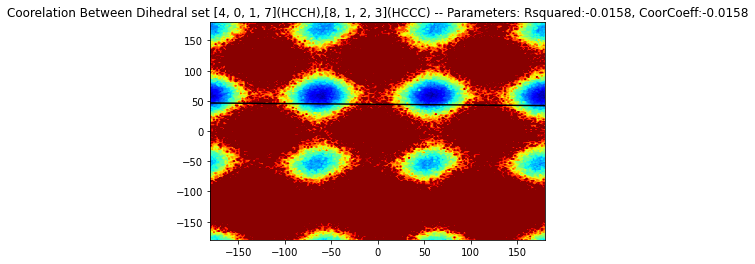

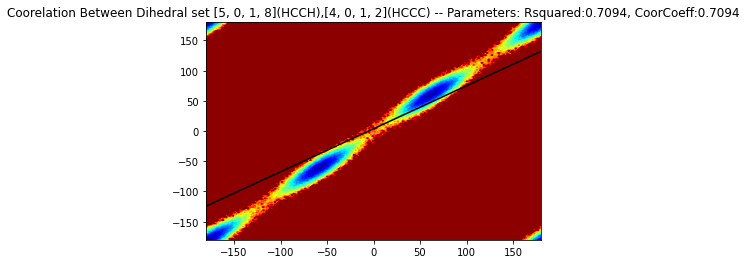

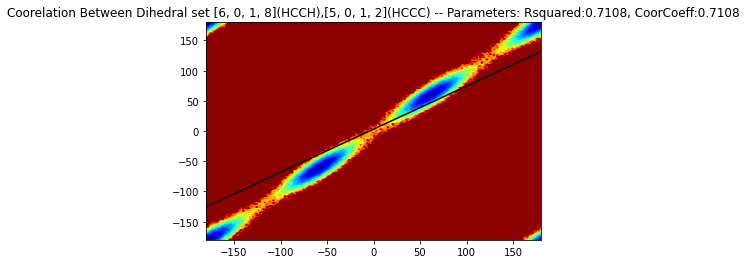

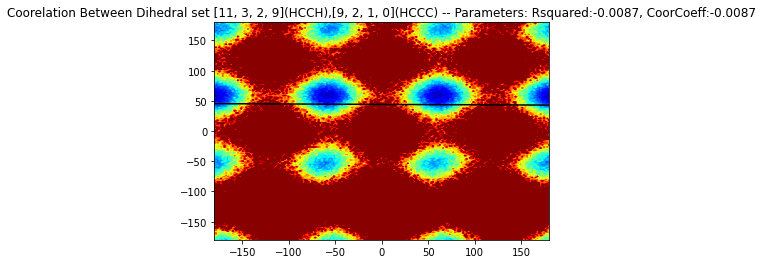

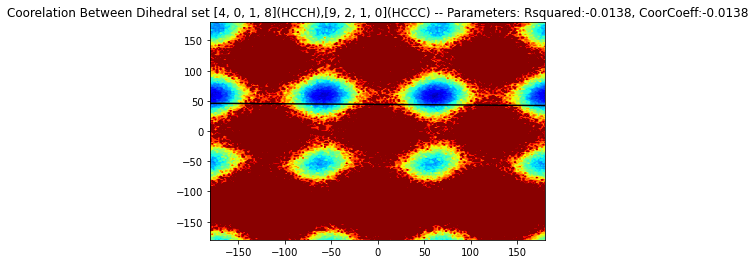

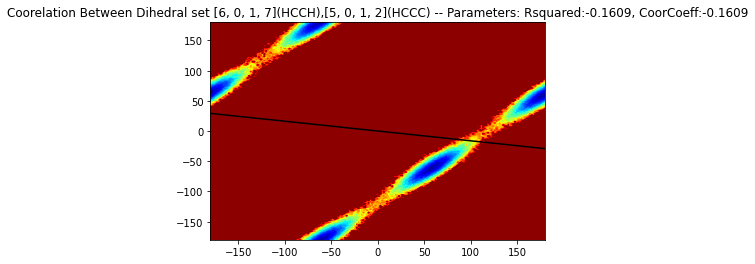

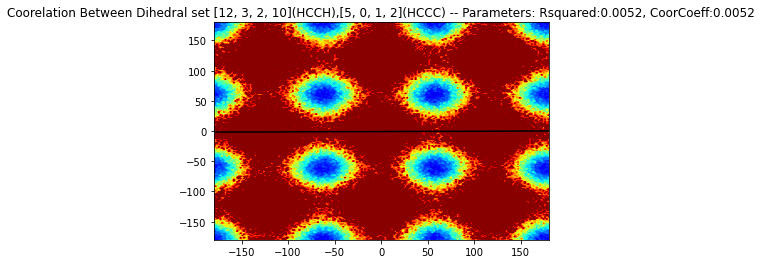

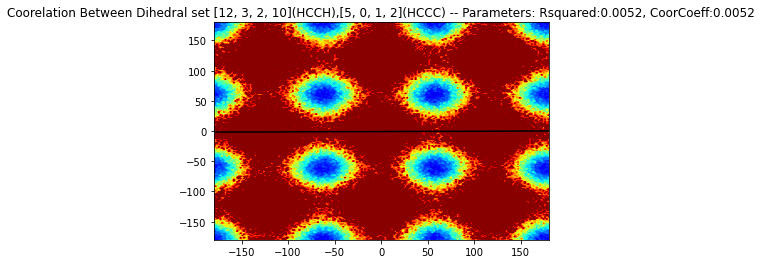

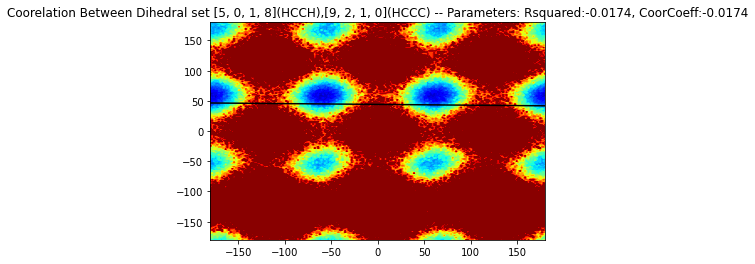

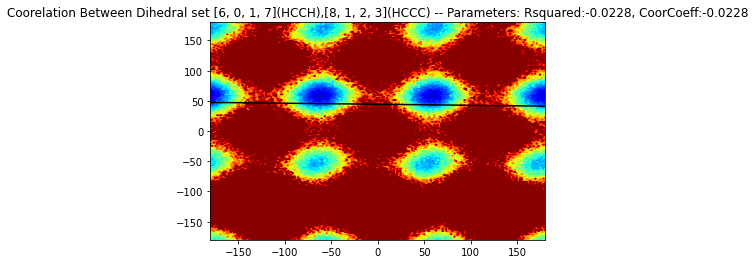

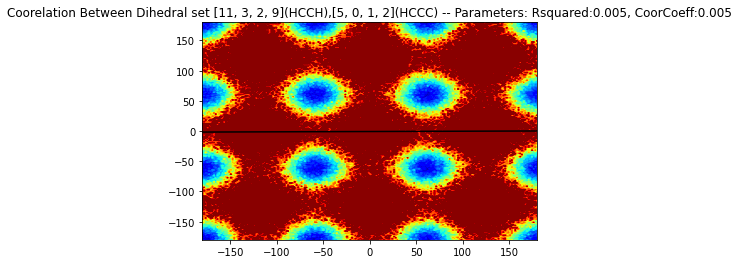

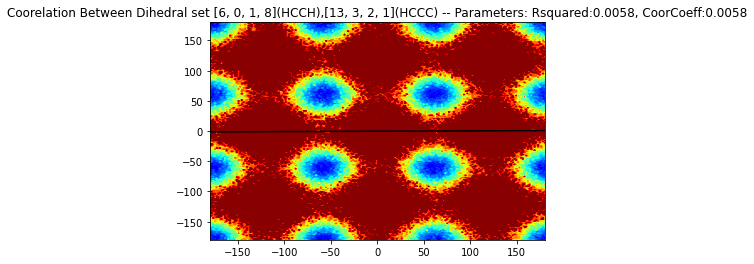

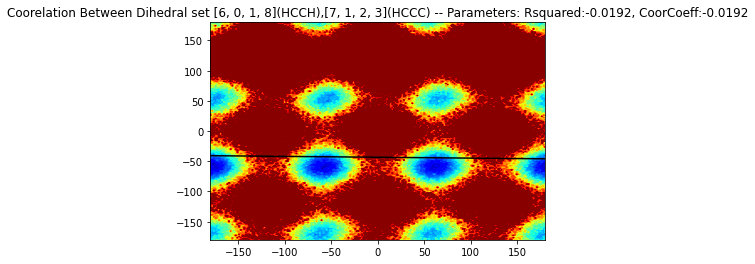

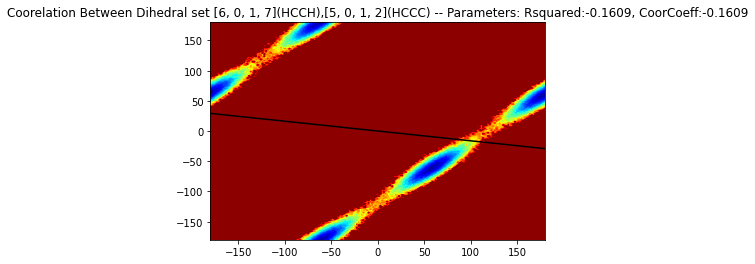

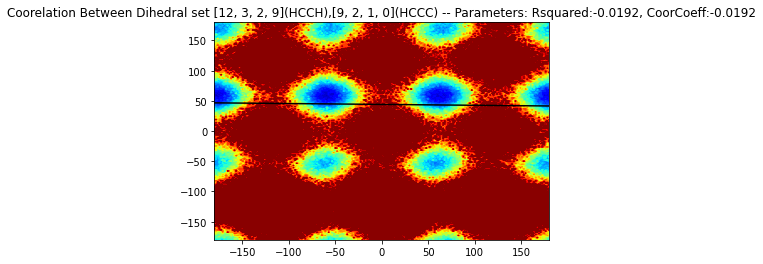

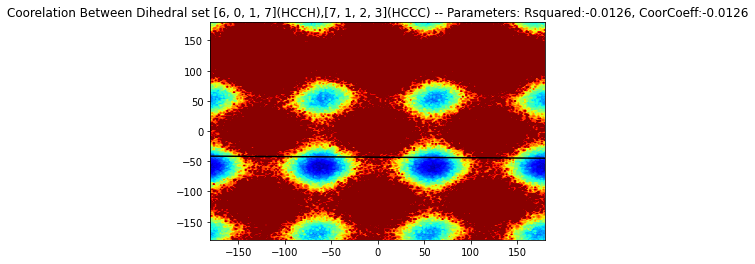

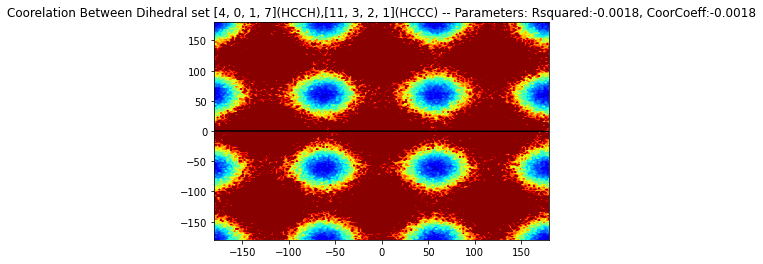

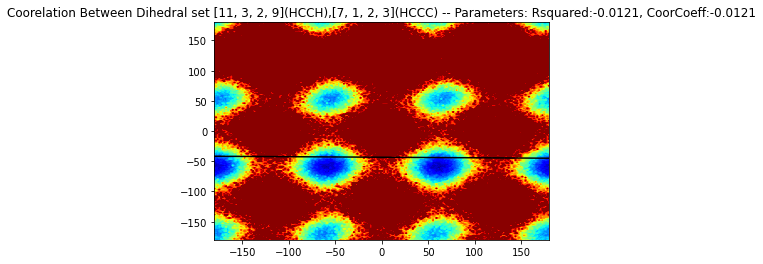

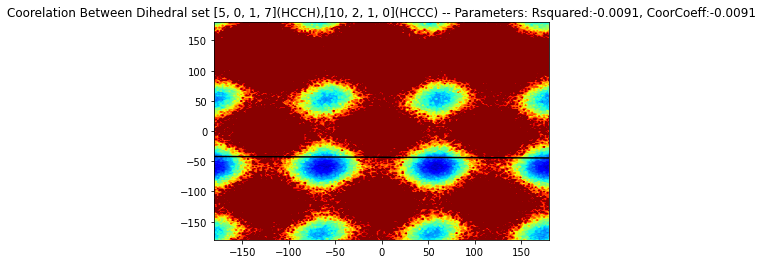

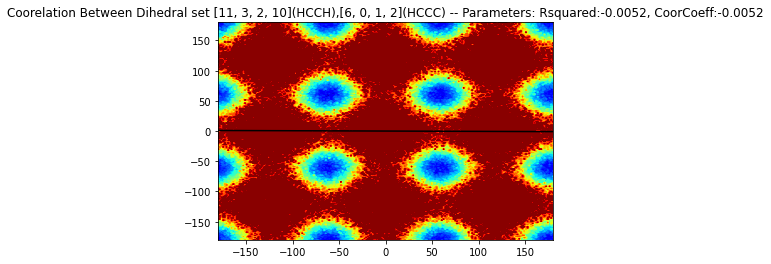

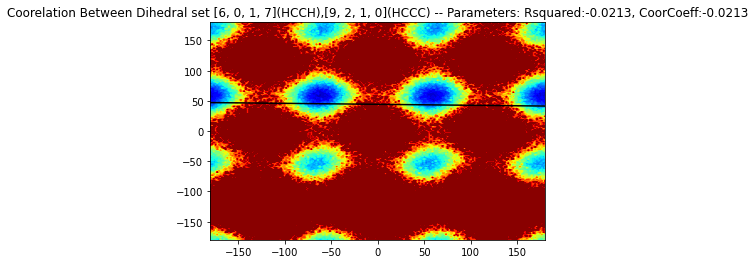

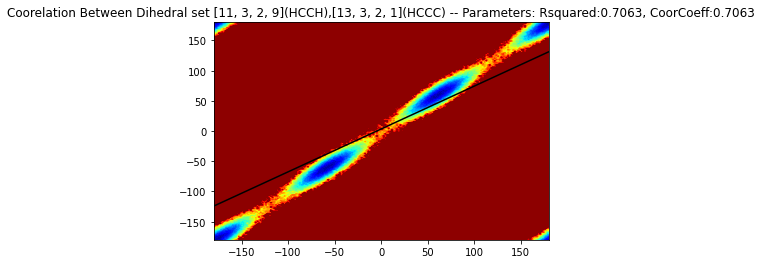

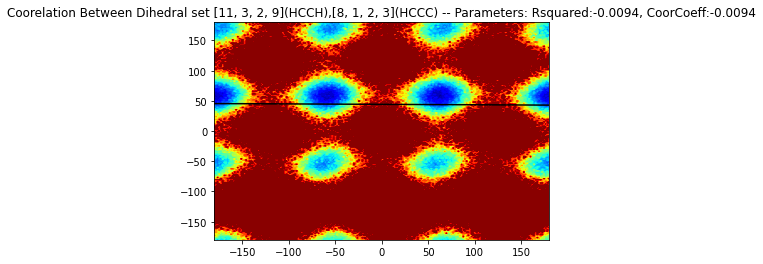

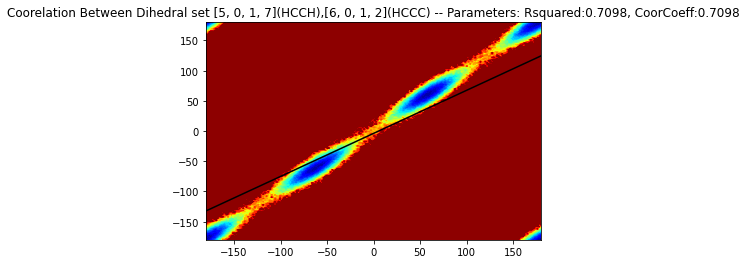

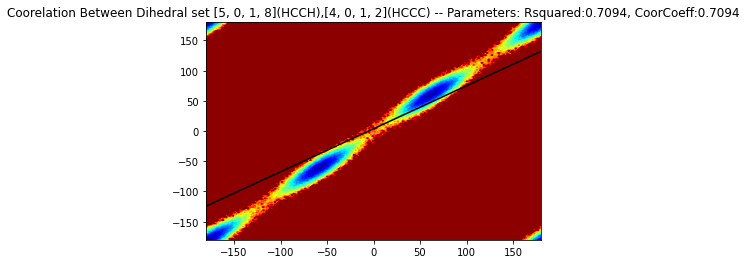

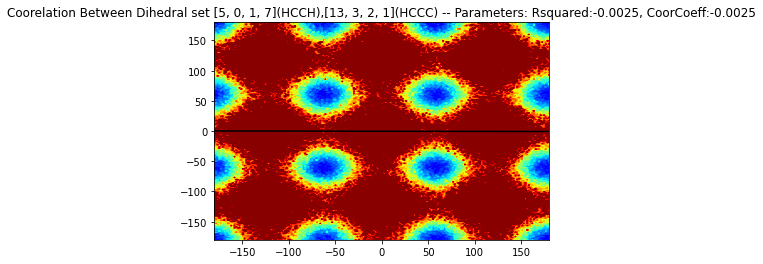

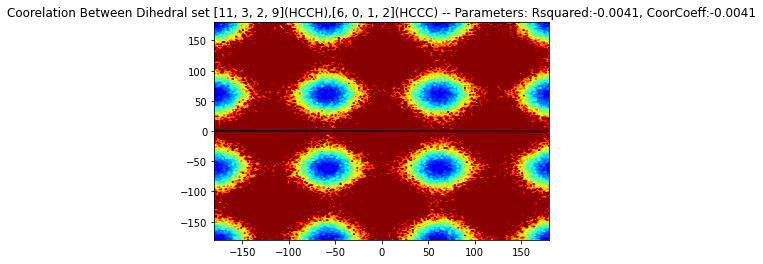

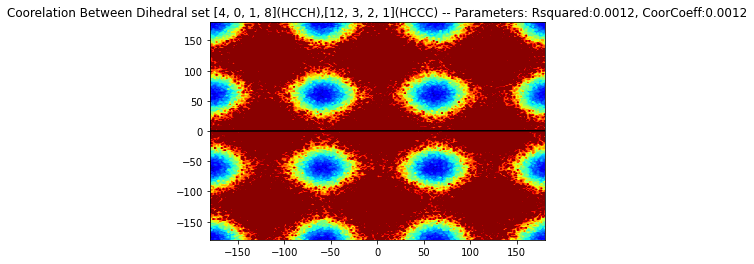

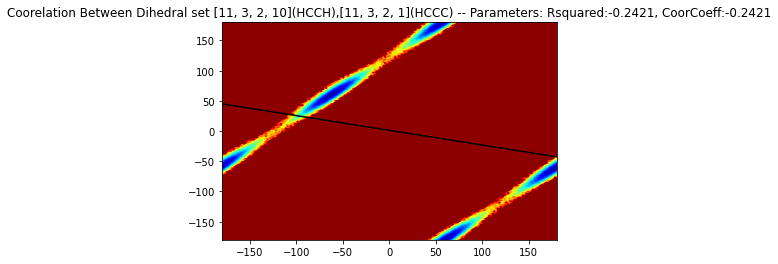

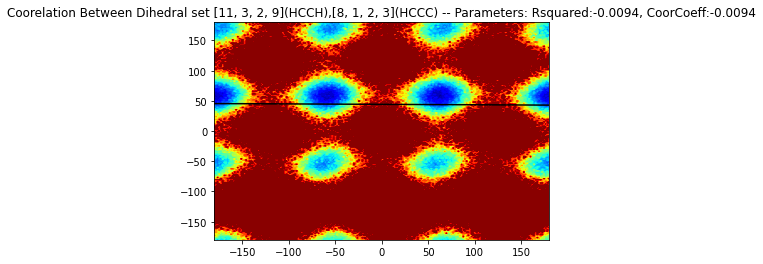

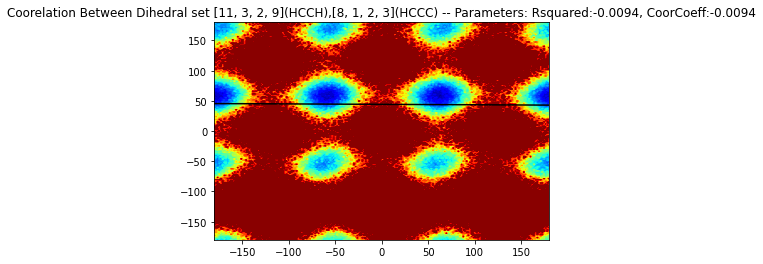

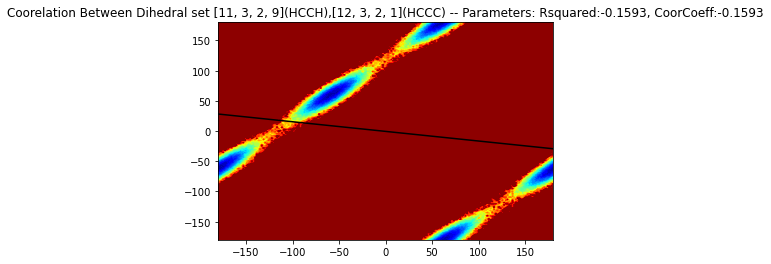

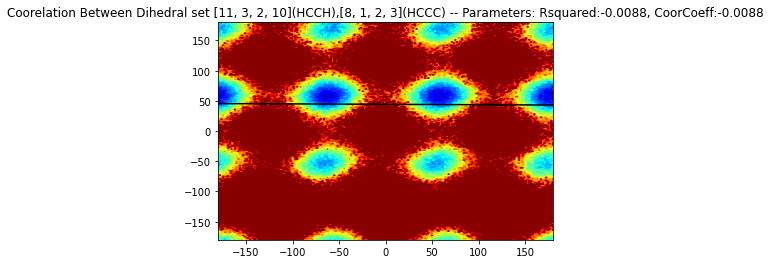

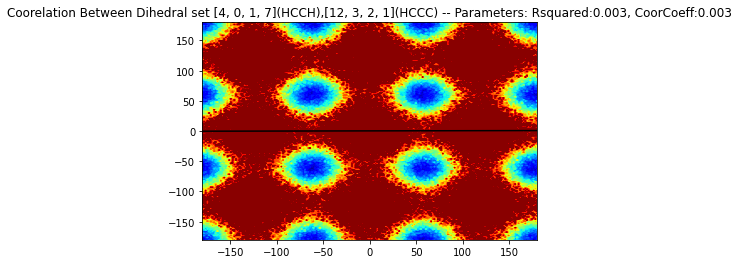

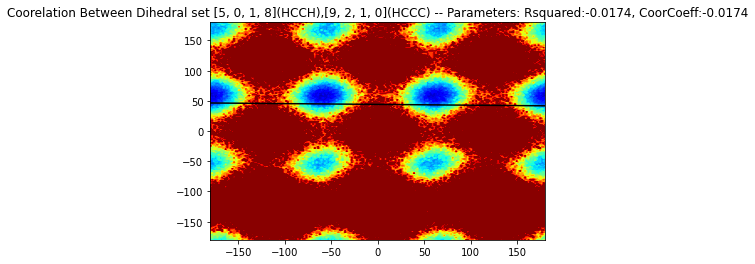

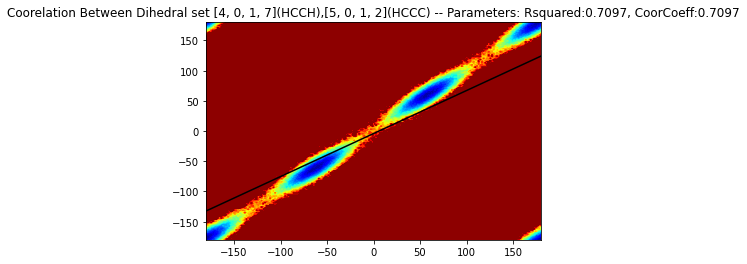

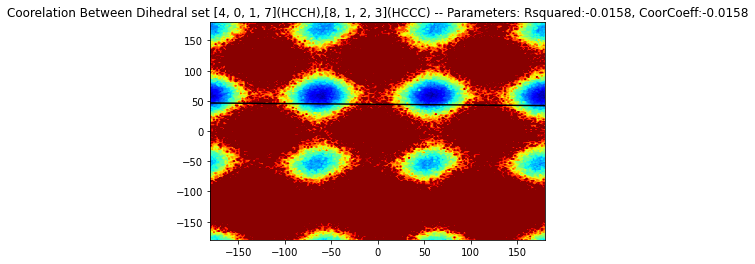

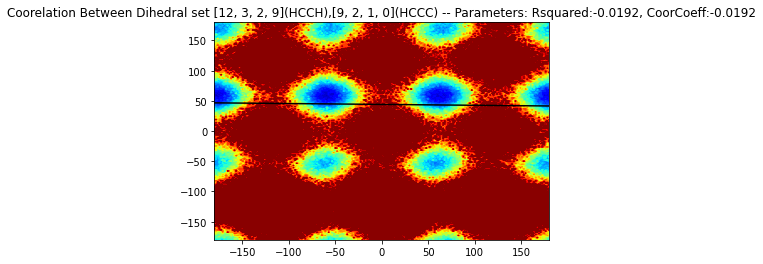

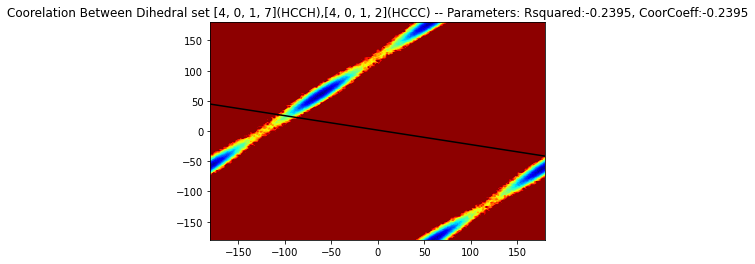

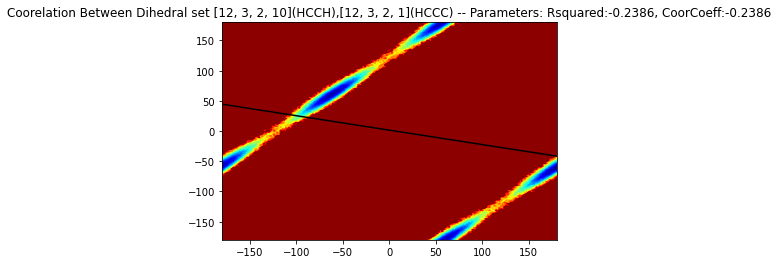

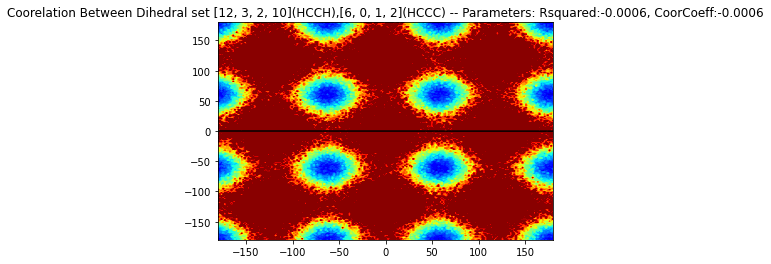

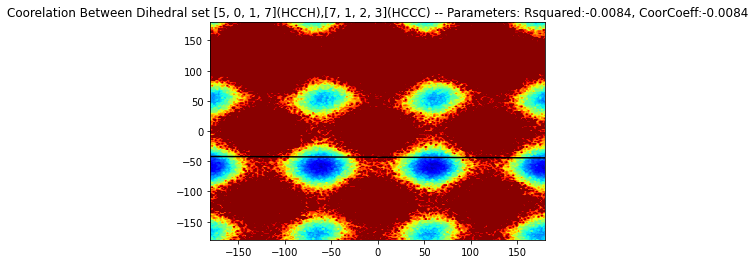

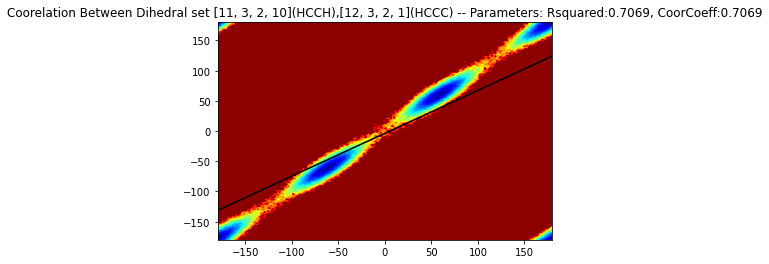

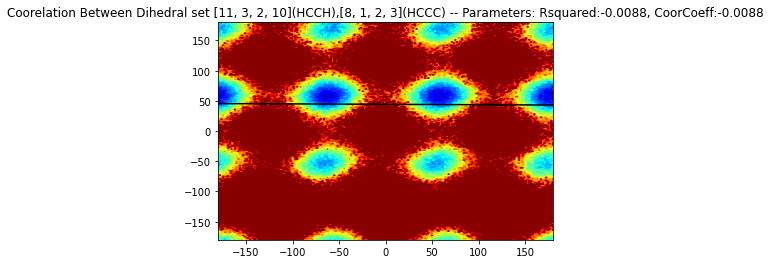

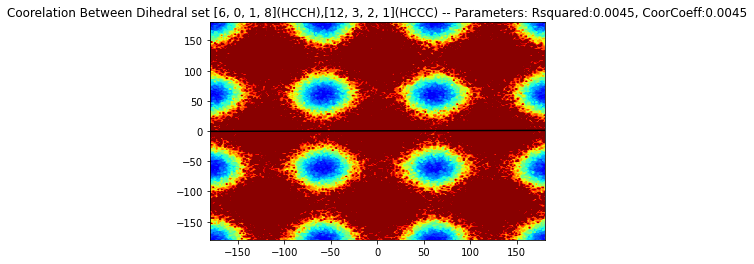

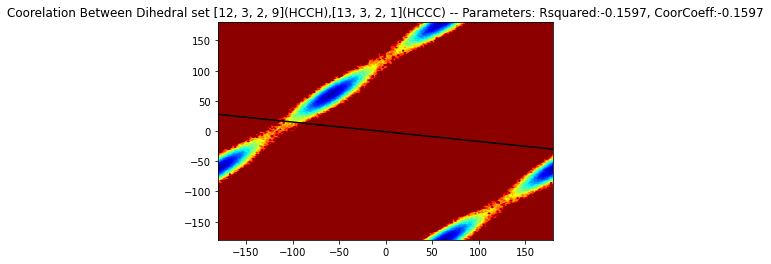

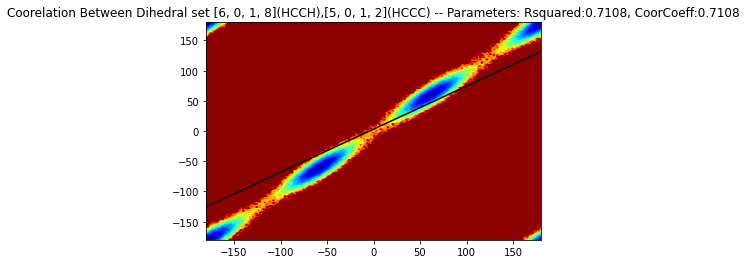

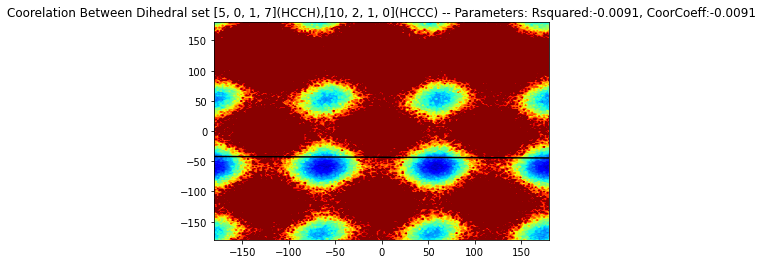

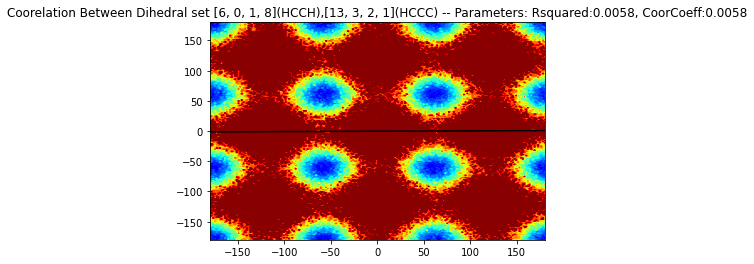

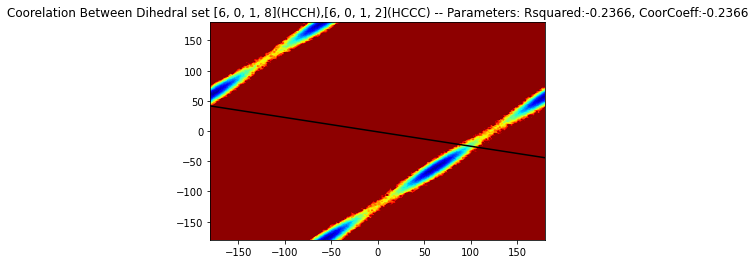

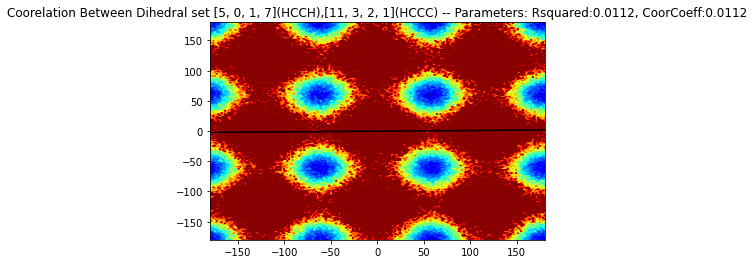

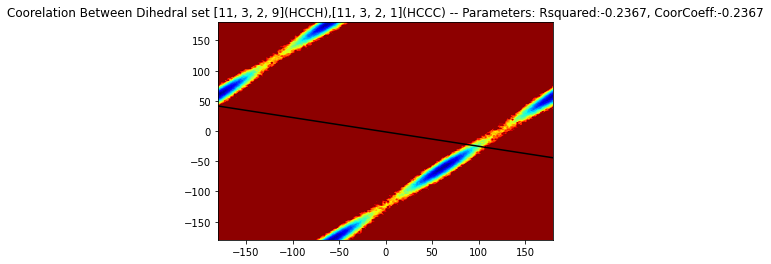

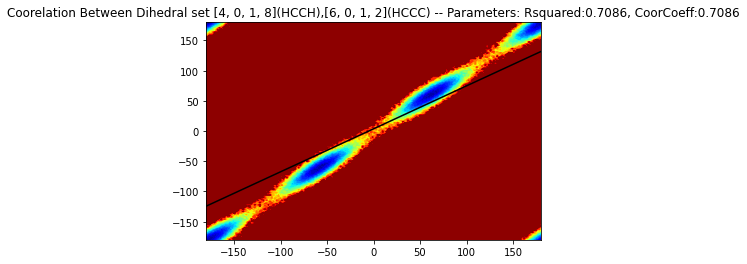

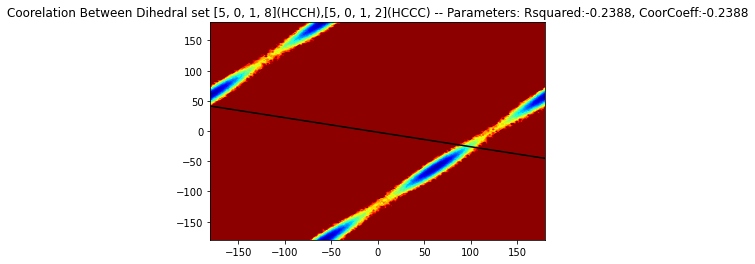

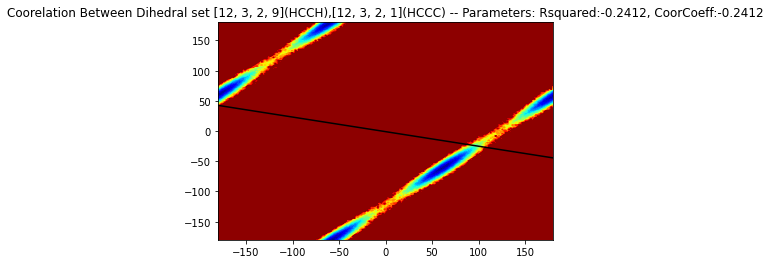

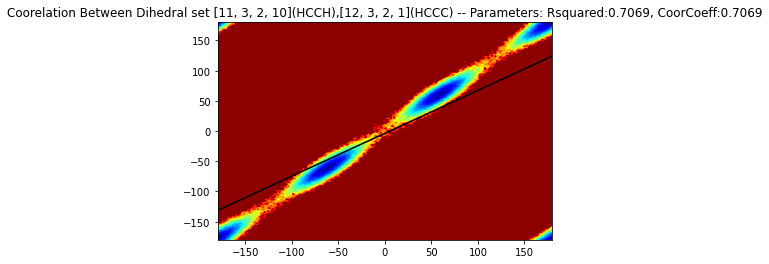

In [565]:
#lets find the correlation between all of the elements of both sets (alot!)
for ri in range(len(tors[0])):
    for rii in range(len(tors[1])):
        plt.figure()
        ri=np.random.randint(10)
        rii=np.random.randint(10)
        f,extent = fe_2D(tors[0][ri],tors[1][rii])
        plt.contourf(f.T,50,extent=extent,cmap="jet")
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(tors[0][ri],tors[1][rii])
        x = np.linspace(tors[0][ri].min(), tors[1][ri].max(),20)
        y = slope*x+intercept
        plt.plot(x,y,c='black',label='best fit line')
        r=np.corrcoef(tors[0][ri],tors[1][rii])[0,1]
        plt.title("Coorelation Between Dihedral set {}({}),{}({}) -- Parameters: Rsquared:{}, CoorCoeff:{}".format(tor_d[names[0]][ri],names[0],tor_d[names[1]][rii],names[1],np.round(r_value,decimals=4),np.round(r,decimals=4)))

In [611]:
#calculate the energy for each hiedral
HCCH_tor_arr = np.stack(tors[0],axis=1)
HCCH_tor_e_arr = HCCH_torsionE(HCCH_tor_arr*(np.pi/180))

CCCH_tor_arr = np.stack(tors[1],axis=1)
CCCH_tor_e_arr = CCCH_torsionE(CCCH_tor_arr*(np.pi/180))

CCCC_tor_e_arr = CCCC_torsionE(dihed*(np.pi/180))

#combine into one energy array
E_arr = np.concatenate([HCCH_tor_e_arr,CCCH_tor_e_arr,CCCC_tor_e_arr.reshape(200000,1)],axis=1)
E_arr.shape

(200000, 23)

Text(0.5, 0, 'Dihedral (deg)')

/usr/local/anaconda3/envs/md-traj/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


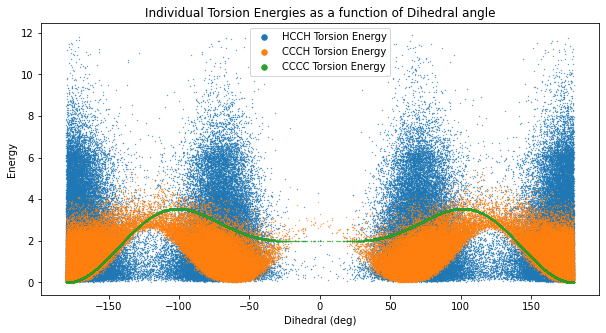

In [629]:
plt.figure(figsize=(10,5))
for j,(name,i) in enumerate(zip(["HCCH","CCCH","CCCC"],[HCCH_tor_e_arr.sum(axis=1),CCCH_tor_e_arr.sum(axis=1),CCCC_tor_e_arr])):
    plt.scatter(dihed,i,label="{} Torsion Energy".format(name),color="C{}".format(str(j)),s=.1)
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.title("Individual Torsion Energies as a function of Dihedral angle")
plt.ylabel("Energy")
plt.xlabel("Dihedral (deg)")
    

Text(0.5, 0, 'Dihedral (deg)')

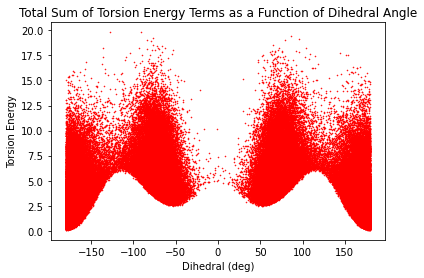

In [618]:
plt.scatter(dihed,E_arr.sum(axis=1),s=.3,c="r")
plt.title("Total Sum of Torsion Energy Terms as a Function of Dihedral Angle")
plt.ylabel("Torsion Energy")
plt.xlabel("Dihedral (deg)")

In [586]:
dihed.shape

(200000,)